# 1. Basic Analysis

## Libraries

In [1]:
# Core utilities
from lib.utils import (
    create_graph, 
    print_graph_data, 
    fit_powerlaw, 
    assortativity_analysis,
    get_degree_sequences
)

# Visualization functions
from lib.visualization import (
    draw_network, 
    draw_sentiment_network,
    plot_dialogues_distribution, 
    plot_loglog_degree_distributions,
    plot_degree_distributions,
    plot_centrality_analysis
)

# Sentiment analysis
from lib.sentiment_analysis import (
    sentiment_heatmap, 
    top_relationships, 
    most_loved_hated,
    print_charisma_rankings,
    plot_heatmap
)

# Community detection
import lib.community as comm
import lib.tf_idf as tfidf

# Indirect analysis
from lib.indirect_analysis import create_graph_from_matrix, compute_sentiment_difference_matrix

# Configuration (for any custom styling needs)
from lib.config import PALETTE, PLOT_CONFIG

# Extensions (optional additional analyses)
# Uncomment to use:
# from lib.extensions import (
#     plot_character_rankings_comparison,
#     plot_sentiment_distribution,
#     plot_community_sentiment_comparison,
#     plot_dialogue_volume_heatmap,
#     analyze_pov_characters,
#     plot_degree_vs_sentiment
# )

## Draw networks

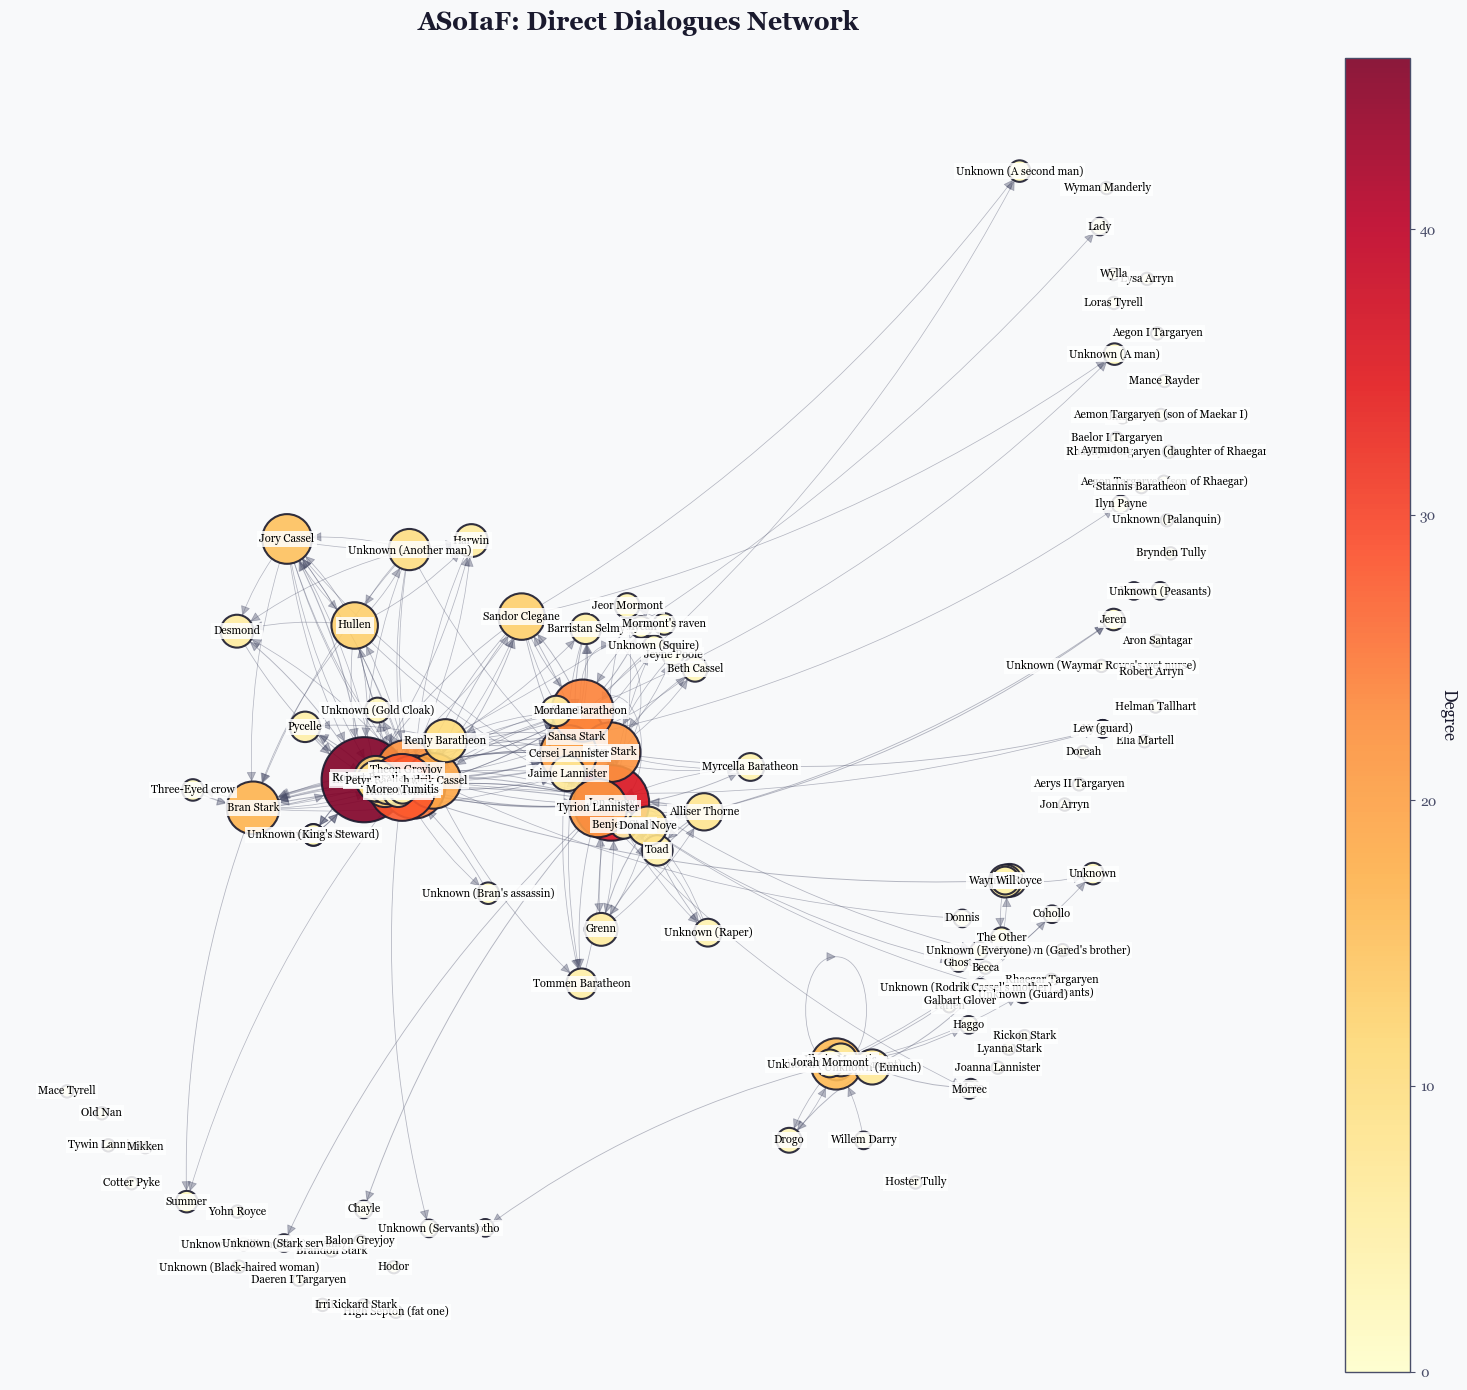

In [2]:
G = create_graph(path_name='data/dialogues.csv', edge_type='direct')
draw_network(
    G, 
    title="ASoIaF: Direct Dialogues Network", 
    file_name="dialogue-direct-network",
    subdirectory="basic"
)

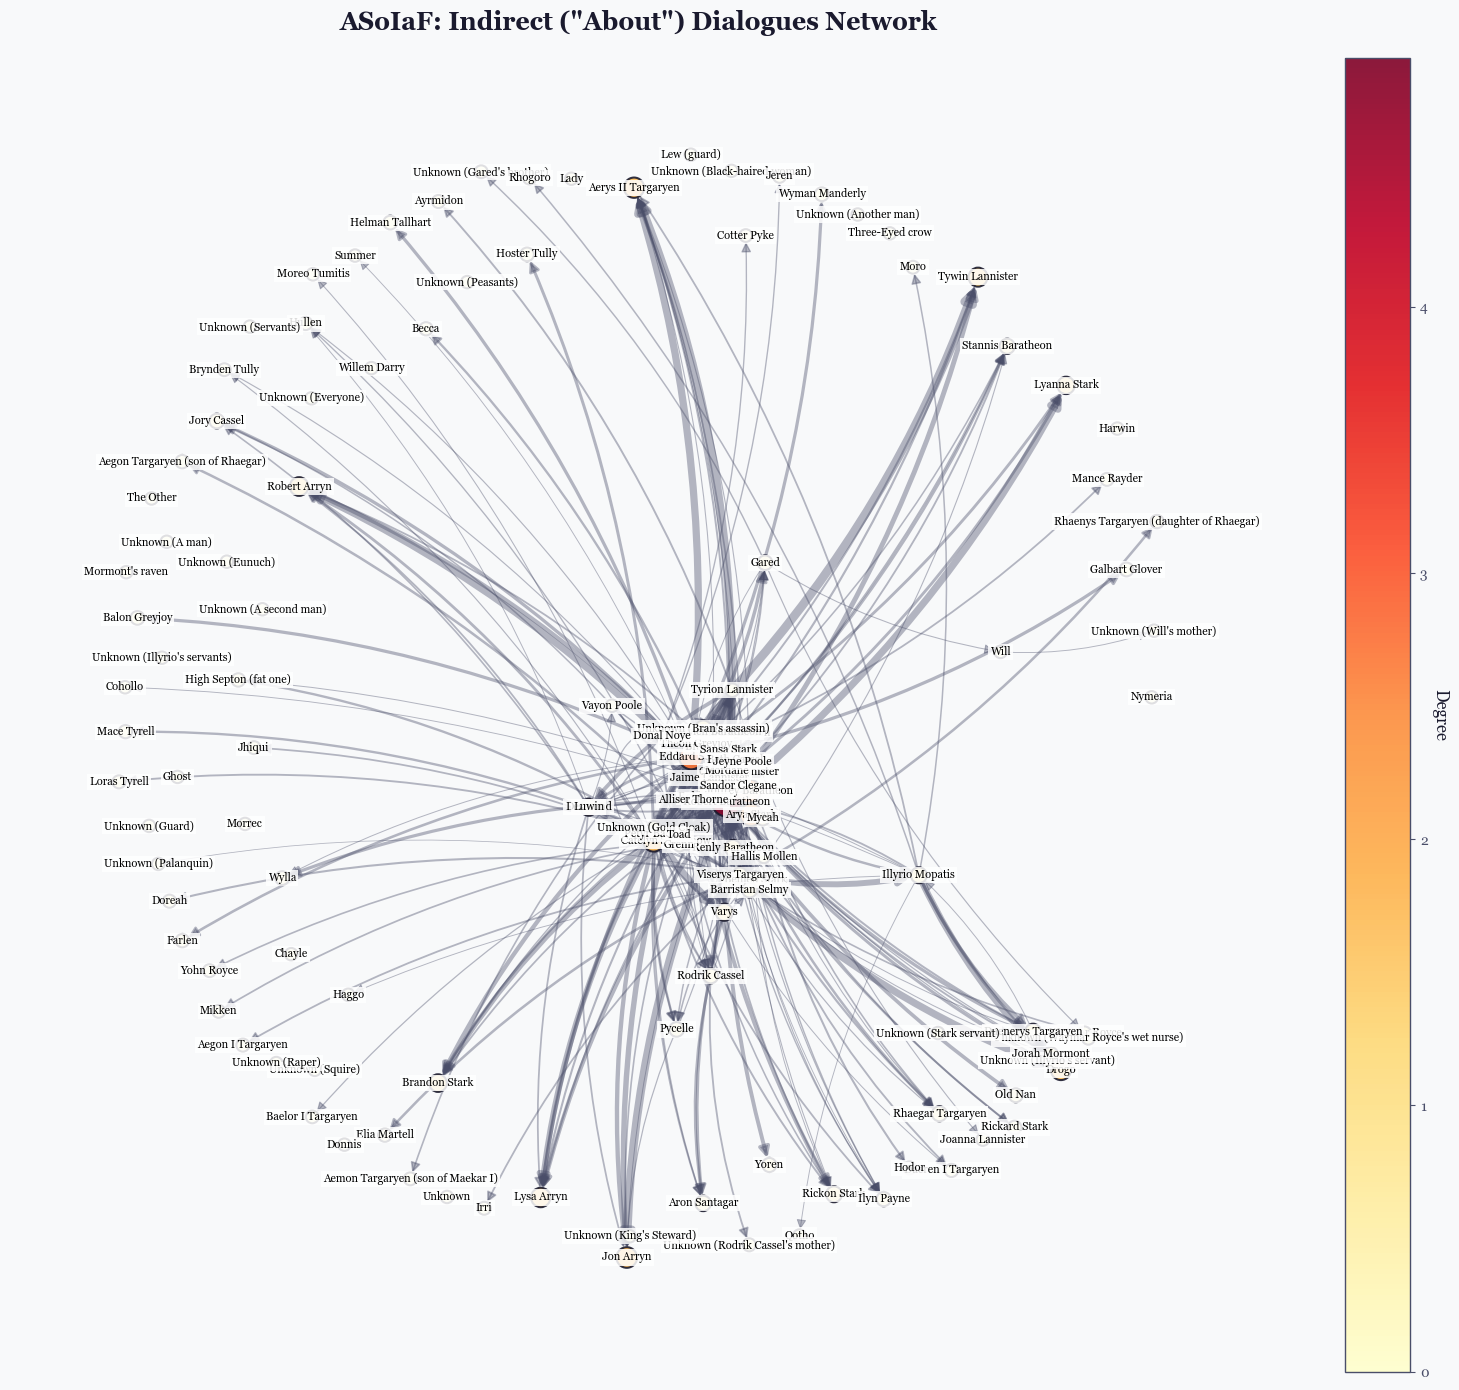

In [3]:
IG = create_graph(path_name='data/dialogues.csv', edge_type='indirect')
draw_network(
    IG,
    node_size_criterion='weighted_in_degree',
    title="ASoIaF: Indirect (\"About\") Dialogues Network", 
    file_name="dialogue-indirect-network",
    subdirectory="basic"
)

## Print basic graph data

In [4]:
print_graph_data(G)

Number of nodes: 133
Number of edges: 303

Min in_degree: 0
Average in_degree: 2.2782
Max in_degree: 22

Min out_degree: 0
Average out_degree: 2.2782
Max out_degree: 24

Average weight: 432.85
Average number of dialogues: 7.62
Maximum number of dialogues: 125


{'num_nodes': 133,
 'num_edges': 303,
 'in_degree': {'min': 0, 'avg': np.float64(2.2781954887218046), 'max': 22},
 'out_degree': {'min': 0, 'avg': np.float64(2.2781954887218046), 'max': 24},
 'weight': {'avg': np.float64(432.85478547854785), 'max': 12481},
 'dialogues': {'avg': np.float64(7.617161716171617), 'max': 125}}

## Degree distribution

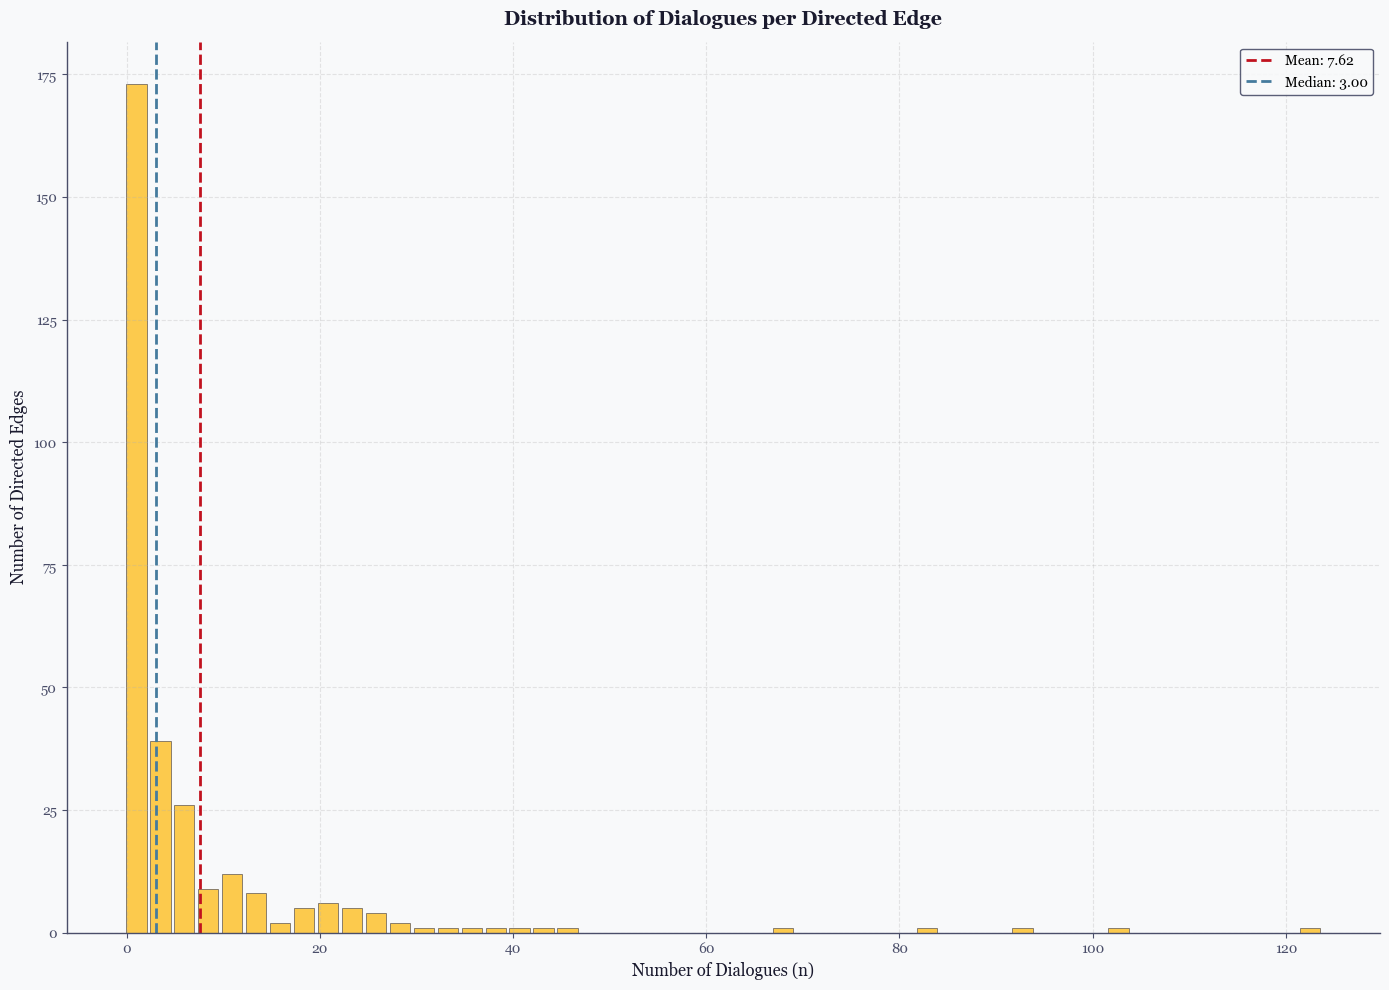


Dialogue Distribution Statistics:
Min dialogues per directed edge: 1
Max dialogues per directed edge: 125
Mean dialogues per directed edge: 7.62
Median dialogues per directed edge: 3.0
Total directed edges: 303


In [5]:
dialogue_counts = plot_dialogues_distribution(G, file_name="dialogue-distribution", subdirectory="basic")

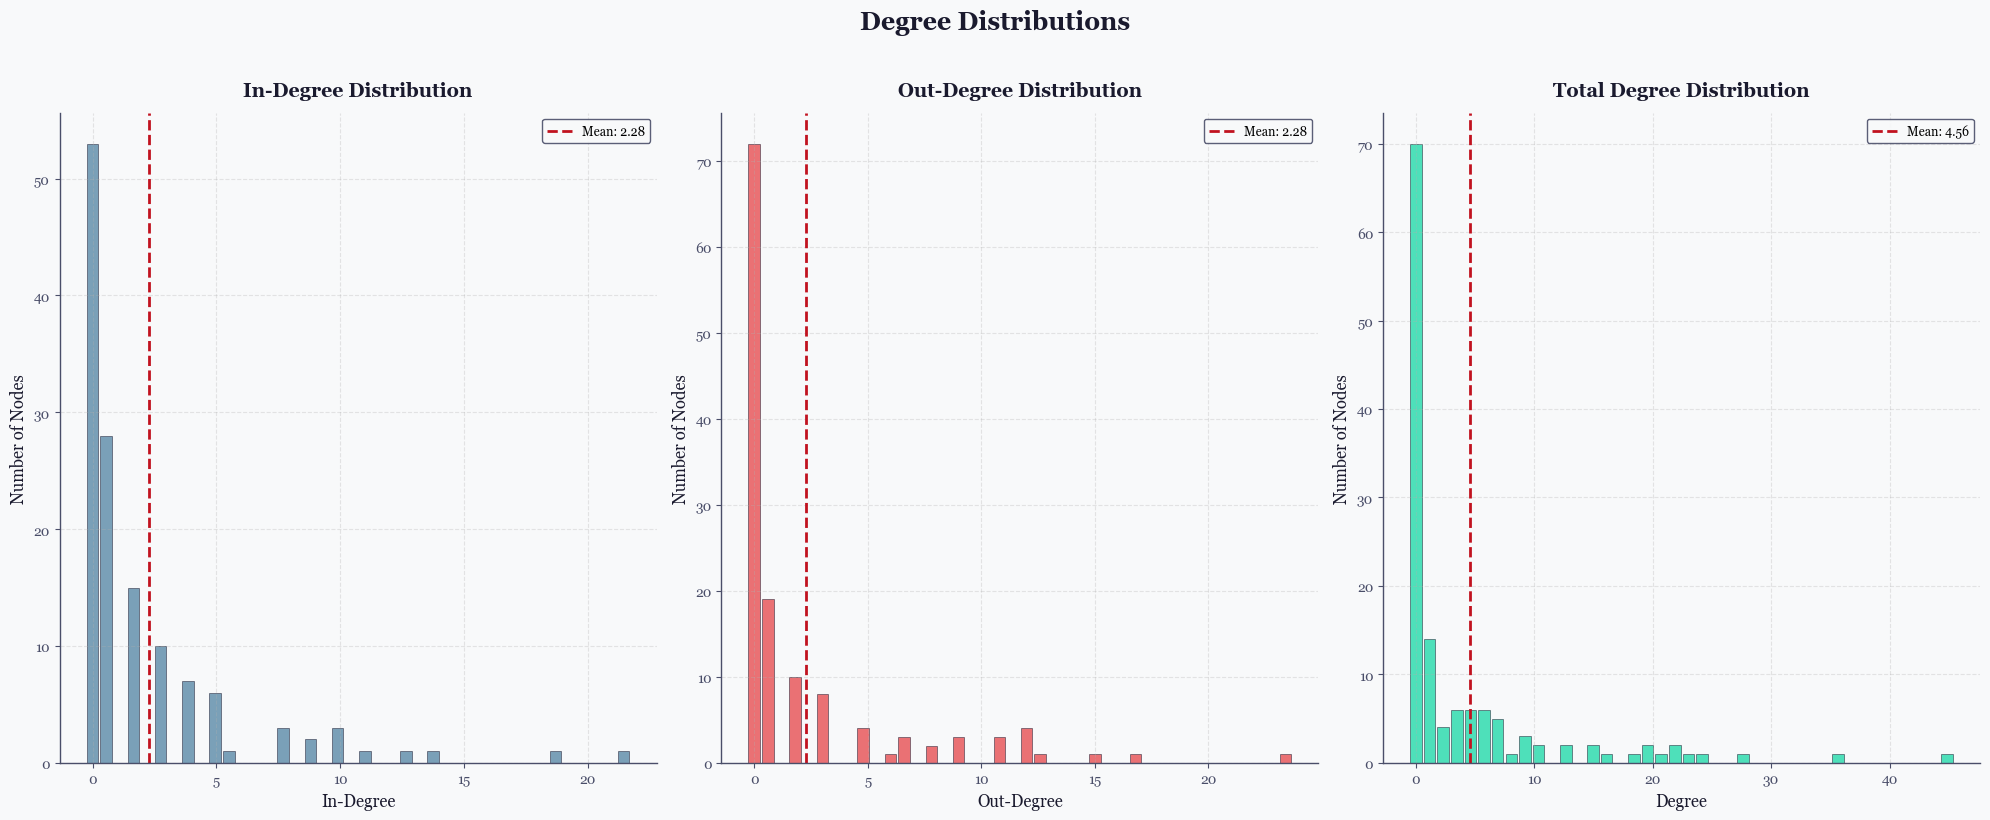

In [6]:
degrees, in_degrees, out_degrees = plot_degree_distributions(G, file_name="degree-distribution", subdirectory="basic")

## Try Fit Powerlaw

In [7]:

print("POWER-LAW EXPONENTS (α) AND FIT RANGE")

alpha_in, x_min_in = fit_powerlaw(in_degrees)
print(f"In-Degree α = {alpha_in:.3f}  (xmin = {x_min_in})")

alpha_out, x_min_out = fit_powerlaw(out_degrees)
print(f"Out-Degree α = {alpha_out:.3f}  (xmin = {x_min_out})")

alpha_total, x_min_total = fit_powerlaw(degrees)
print(f"Total-Degree α = {alpha_total:.3f}  (xmin = {x_min_total})")

alpha_dialogue, x_min_dialogue = fit_powerlaw(dialogue_counts)
print(f"Dialogue-Count α = {alpha_dialogue:.3f}  (xmin = {x_min_dialogue})")


POWER-LAW EXPONENTS (α) AND FIT RANGE
In-Degree α = 1.619  (xmin = 1.0)
Out-Degree α = 1.548  (xmin = 1.0)
Total-Degree α = 1.488  (xmin = 1.0)
Dialogue-Count α = 1.509  (xmin = 1.0)


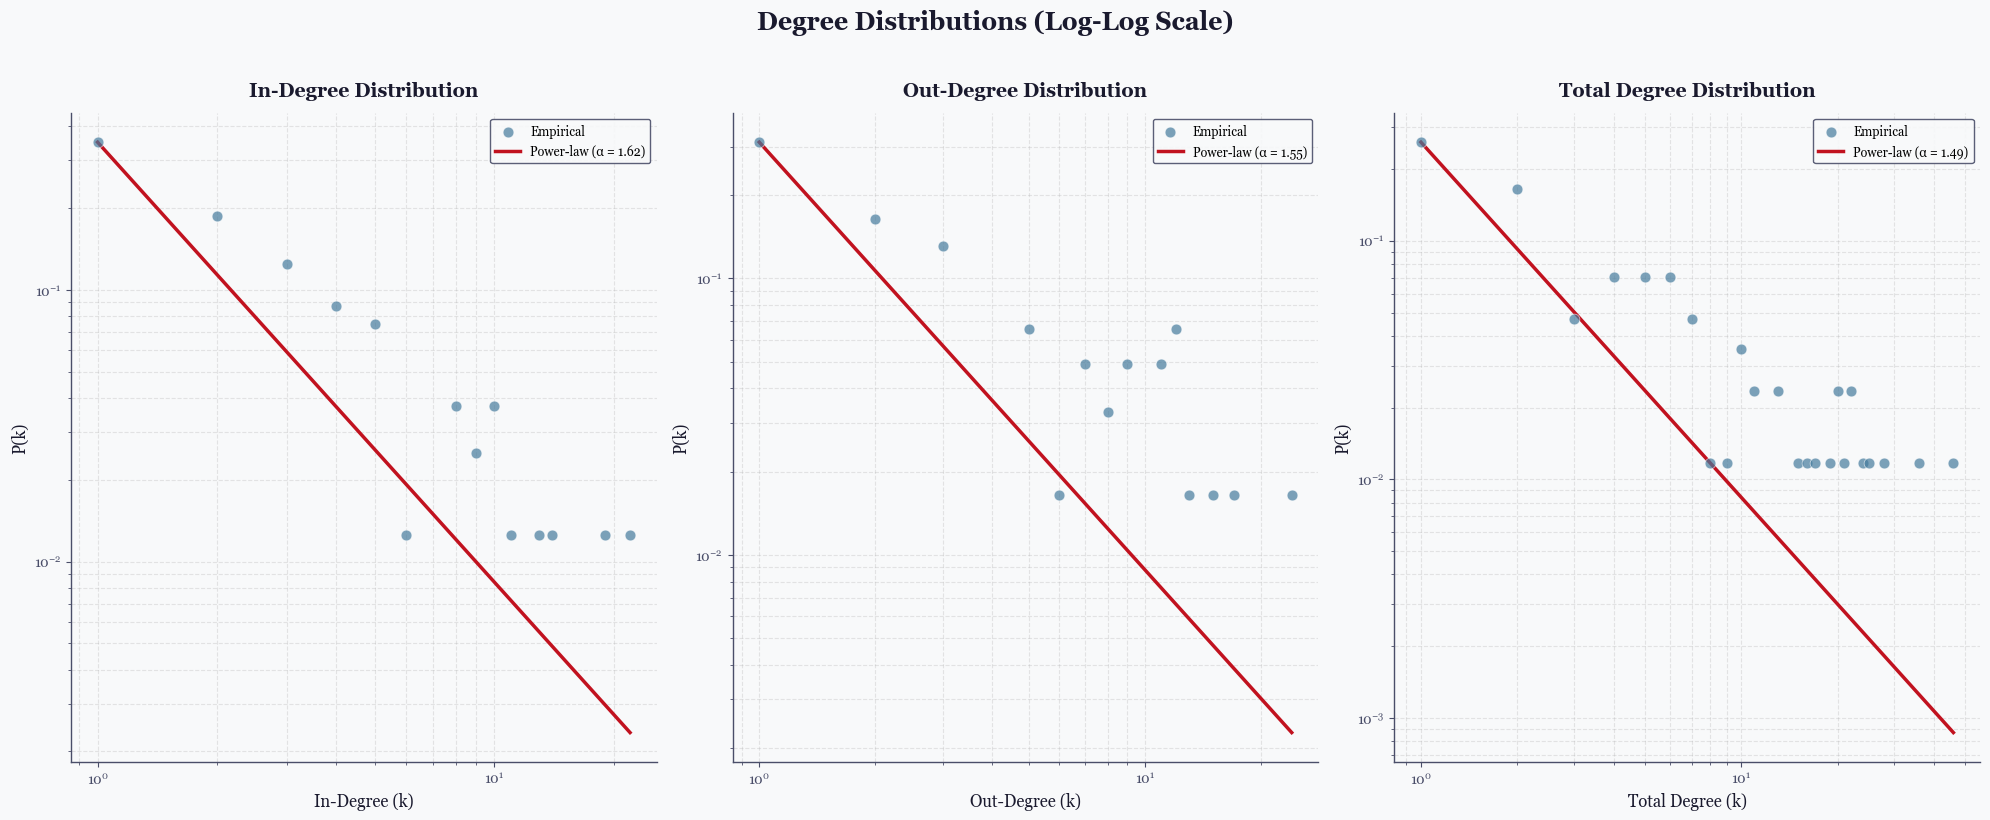

In [8]:
_ = plot_loglog_degree_distributions(G, file_name="loglog-degree-distribution", subdirectory="basic")

## Centrality and Assortativity

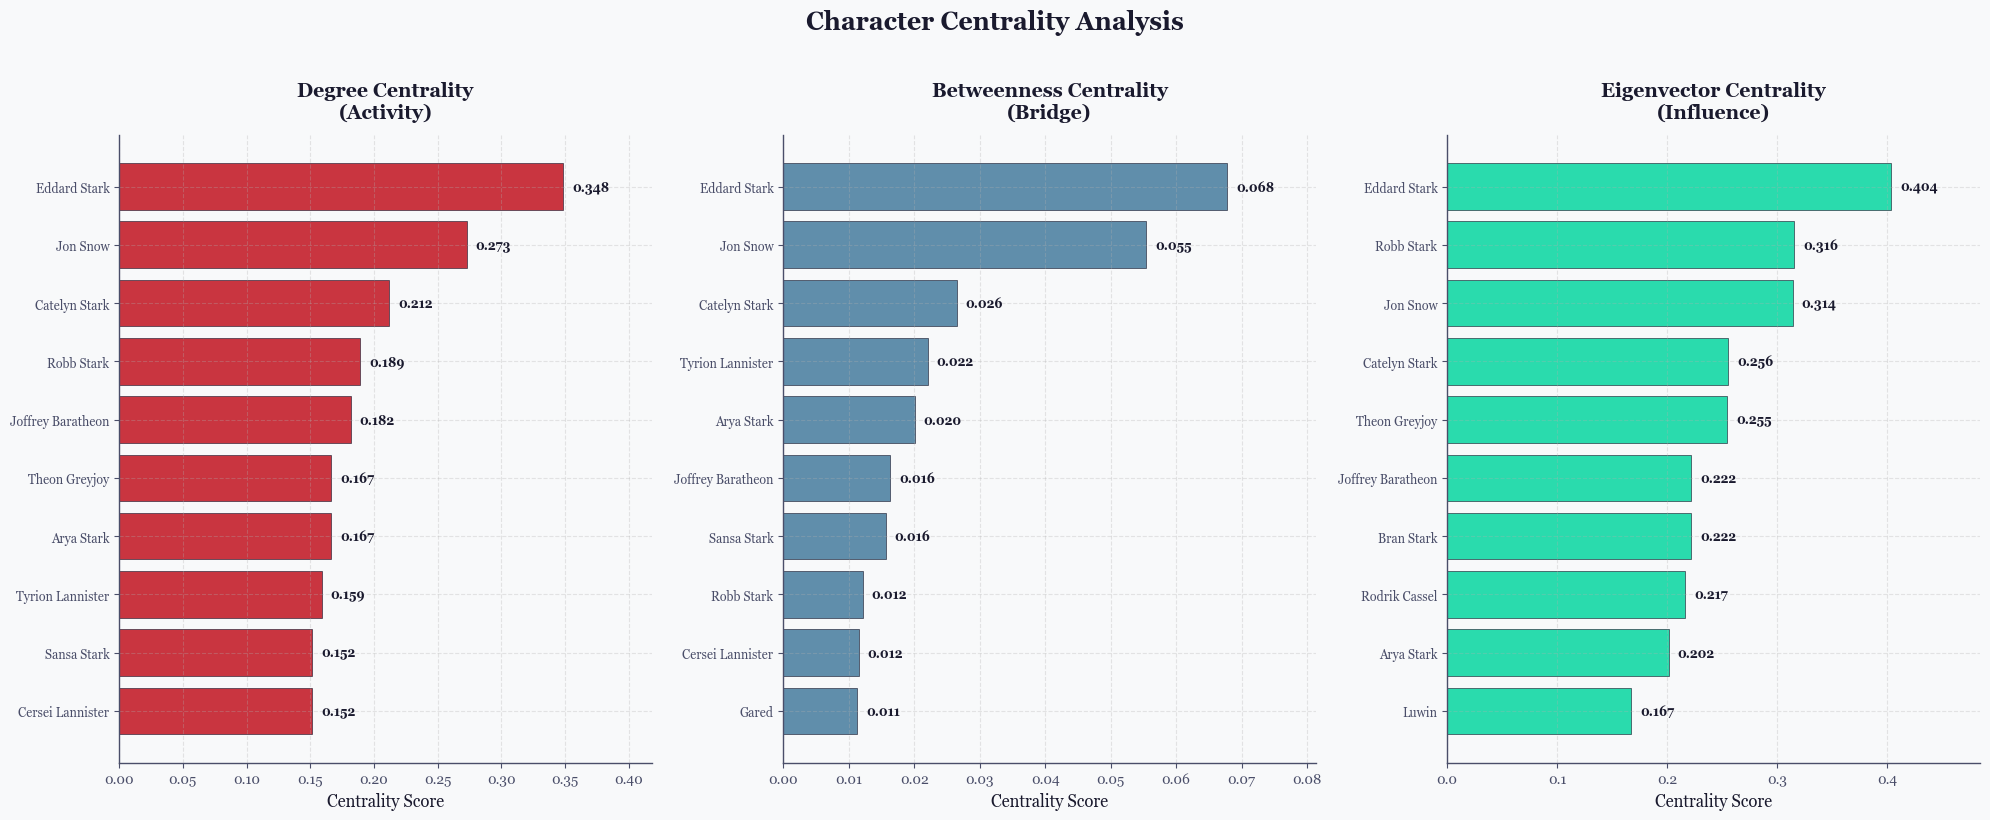

In [9]:
_ = plot_centrality_analysis(
    G, 
    title="Character Centrality Analysis", 
    file_name="centrality-analysis",
    subdirectory="basic"
)

In [10]:
assortativity_analysis(G)

Degree Assortativity Coefficient (r): -0.1150
  → Disassortative network: high-degree nodes connect to low-degree nodes


-0.11500619237161917

- - -

# 2. Sentiment Analysis


Extracting dialogues from graph edges...
Extracted 2308 dialogues from graph
Analyzing sentiment for all dialogues...
Global average sentiment score (m): 0.0076
Confidence parameter (C): 7.62 (avg dialogues per pair)


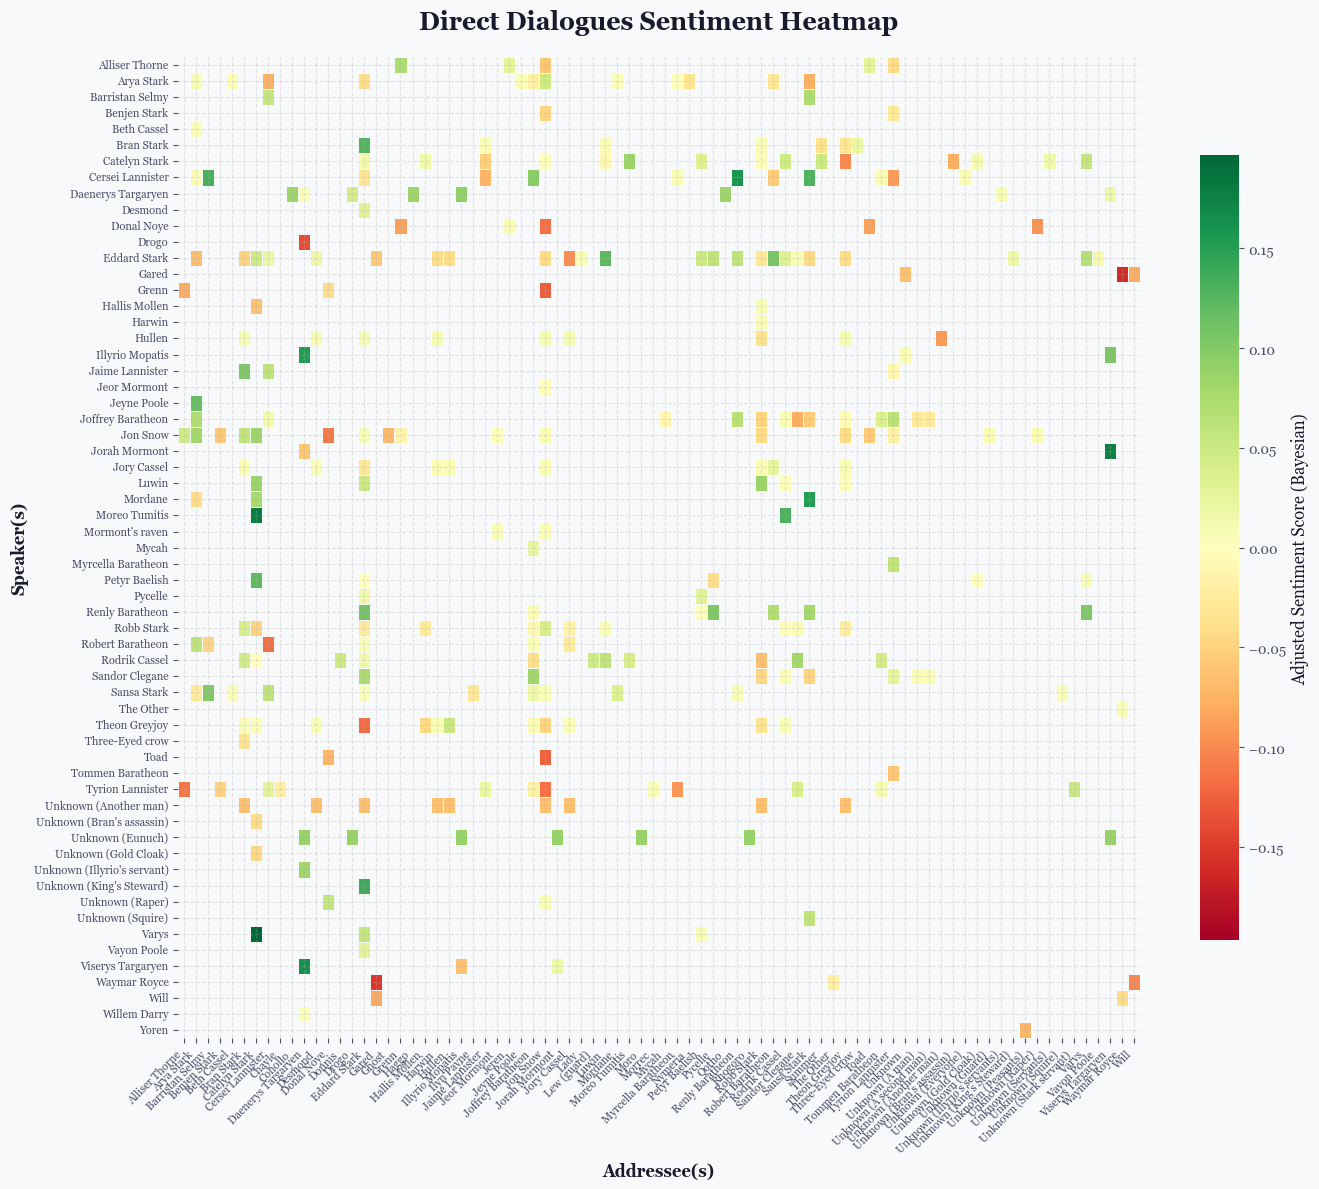

In [11]:
G, dialogue_data, relationship_data = sentiment_heatmap(
    G, 
    remove_empty=True, 
    title="Direct Dialogues Sentiment Heatmap", 
    file_name="sentiment-heatmap",
    subdirectory="sentiment"
)

In [12]:
_ = top_relationships(relationship_data, n=10)


Top 10 Positive Relationships (1-way):
1. Varys → Catelyn Stark: 0.1968 (13 dialogues)
2. Moreo Tumitis → Catelyn Stark: 0.1793 (9 dialogues)
3. Jorah Mormont → Viserys Targaryen: 0.1764 (2 dialogues)
4. Viserys Targaryen → Daenerys Targaryen: 0.1629 (38 dialogues)
5. Cersei Lannister → Renly Baratheon: 0.1593 (2 dialogues)
6. Illyrio Mopatis → Daenerys Targaryen: 0.1519 (22 dialogues)
7. Mordane → Sansa Stark: 0.1518 (8 dialogues)
8. Unknown (King's Steward) → Eddard Stark: 0.1378 (4 dialogues)
9. Cersei Lannister → Barristan Selmy: 0.1335 (5 dialogues)
10. Cersei Lannister → Sansa Stark: 0.1304 (3 dialogues)

Top 10 Negative Relationships (1-way):
1. Gared → Waymar Royce: -0.1600 (22 dialogues)
2. Waymar Royce → Gared: -0.1519 (14 dialogues)
3. Drogo → Daenerys Targaryen: -0.1378 (7 dialogues)
4. Grenn → Jon Snow: -0.1276 (2 dialogues)
5. Toad → Jon Snow: -0.1253 (3 dialogues)
6. Theon Greyjoy → Eddard Stark: -0.1193 (4 dialogues)
7. Robert Baratheon → Cersei Lannister: -0.1176 (10 

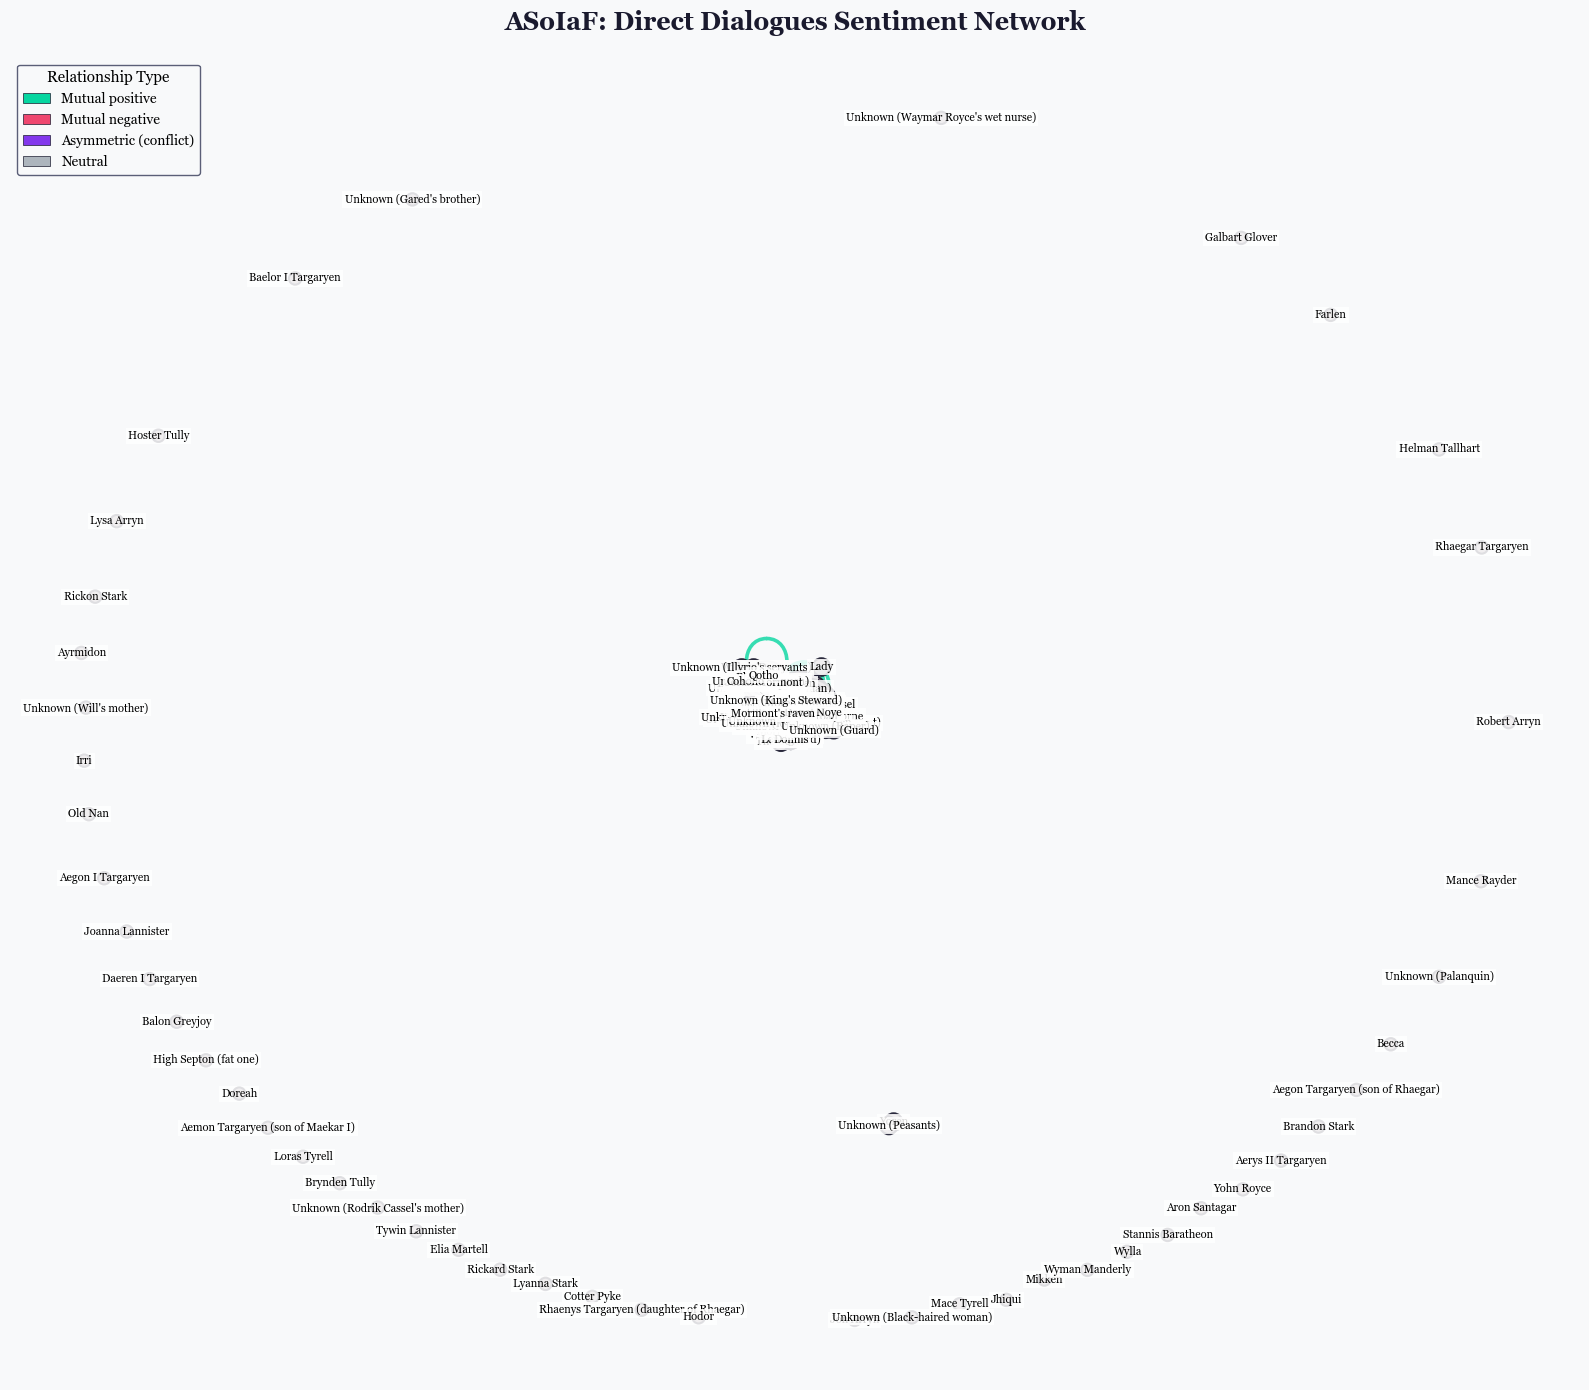

In [13]:
_ = draw_sentiment_network(
    G, 
    relationship_data, 
    title="ASoIaF: Direct Dialogues Sentiment Network", 
    file_name="sentiment-direct-dialogues-network",
    subdirectory="sentiment"
)

# Most loved and hated characters (with Bayesian average)

In [14]:
most_loved, most_hated = most_loved_hated(relationship_data, n=10)
print_charisma_rankings(most_loved, most_hated)

MOST LOVED CHARACTERS (Highest Charisma)
 1. Daenerys Targaryen        charisma: +0.0848 (77 incoming dialogues)
 2. Robert Baratheon          charisma: +0.0764 (115 incoming dialogues)
 3. Viserys Targaryen         charisma: +0.0492 (32 incoming dialogues)
 4. Catelyn Stark             charisma: +0.0463 (261 incoming dialogues)
 5. Varys                     charisma: +0.0313 (24 incoming dialogues)
 6. Renly Baratheon           charisma: +0.0272 (15 incoming dialogues)
 7. Luwin                     charisma: +0.0269 (45 incoming dialogues)
 8. Barristan Selmy           charisma: +0.0266 (8 incoming dialogues)
 9. Rodrik Cassel             charisma: +0.0258 (45 incoming dialogues)
10. Petyr Baelish             charisma: +0.0257 (49 incoming dialogues)

MOST HATED CHARACTERS (Lowest Charisma)
 1. Waymar Royce              charisma: -0.0574 (45 incoming dialogues)
 2. Gared                     charisma: -0.0470 (16 incoming dialogues)
 3. Jon Snow                  charisma: -0.0465 (226 

In [15]:
AG = create_graph(path_name="data/dialogues.csv", edge_type="indirect")

Extracting dialogues from graph edges...
Extracted 1076 dialogues from graph
Analyzing sentiment for all dialogues...
Global average sentiment score (m): 0.0030
Confidence parameter (C): 2.80 (avg dialogues per pair)


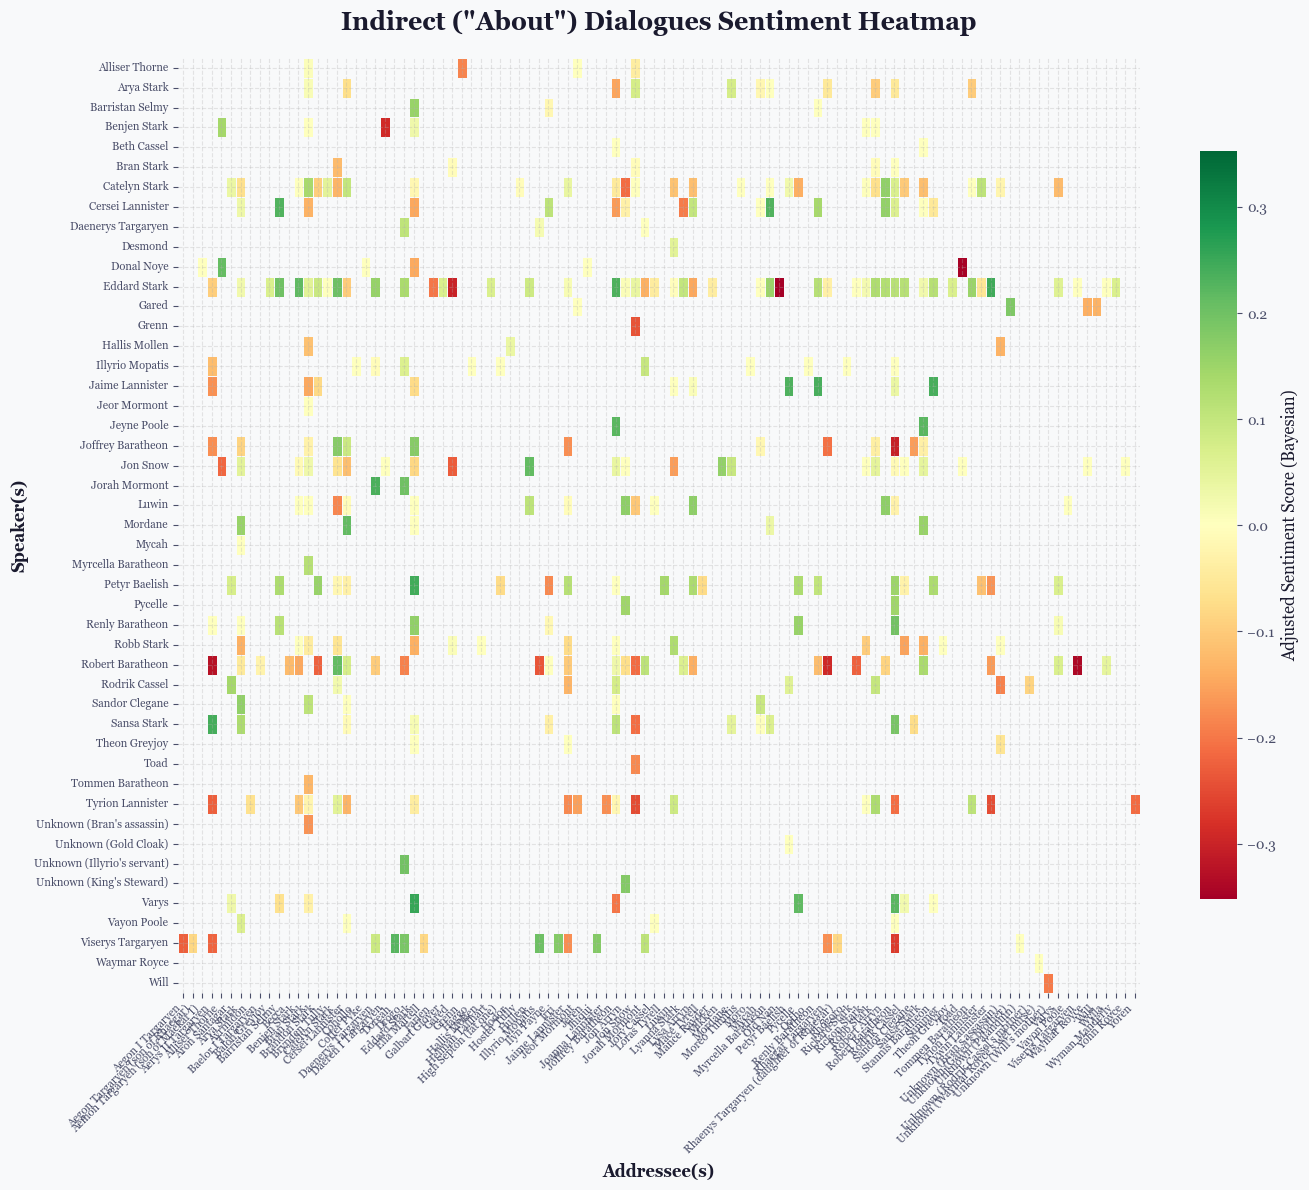

In [16]:
AG, about_dialogue_data, about_relationship_data = sentiment_heatmap(
    AG, 
    remove_empty=True, 
    title="Indirect (\"About\") Dialogues Sentiment Heatmap", 
    file_name="sentiment-about-heatmap",
    subdirectory="sentiment"
)

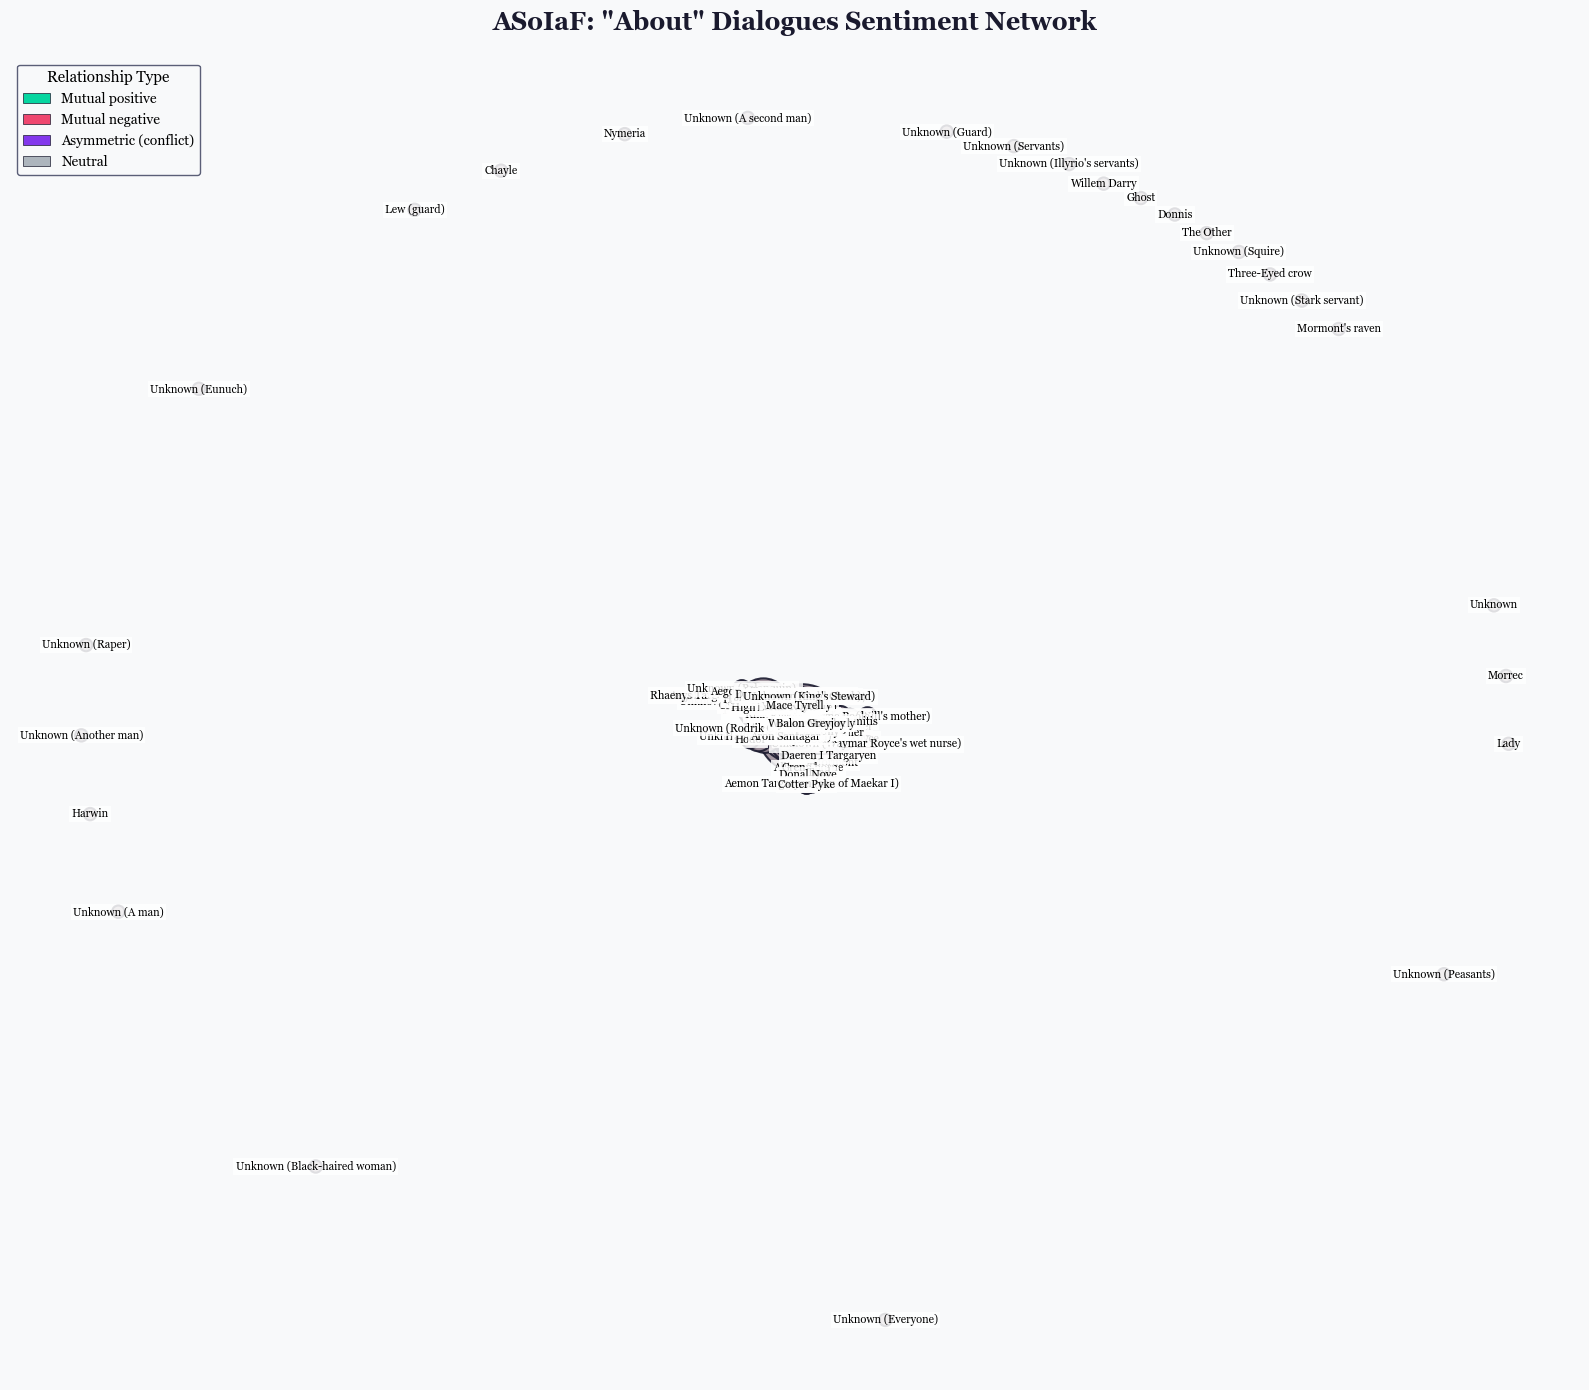

In [17]:
draw_sentiment_network(
    AG, 
    relationship_data=about_relationship_data, 
    network_type="undirected", 
    title="ASoIaF: \"About\" Dialogues Sentiment Network", 
    file_name="sentiment-about-dialogues-network",
    subdirectory="sentiment"
)

In [18]:
about_most_loved, about_most_hated = most_loved_hated(about_relationship_data, n=10)
print_charisma_rankings(about_most_loved, about_most_hated)

MOST LOVED CHARACTERS (Highest Charisma)
 1. Drogo                     charisma: +0.0790 (32 incoming dialogues)
 2. Illyrio Mopatis           charisma: +0.0646 (11 incoming dialogues)
 3. Robert Baratheon          charisma: +0.0485 (84 incoming dialogues)
 4. Renly Baratheon           charisma: +0.0478 (9 incoming dialogues)
 5. Catelyn Stark             charisma: +0.0476 (34 incoming dialogues)
 6. Doreah                    charisma: +0.0476 (3 incoming dialogues)
 7. Lyanna Stark              charisma: +0.0444 (20 incoming dialogues)
 8. Myrcella Baratheon        charisma: +0.0443 (12 incoming dialogues)
 9. Robb Stark                charisma: +0.0421 (31 incoming dialogues)
10. Stannis Baratheon         charisma: +0.0390 (6 incoming dialogues)

MOST HATED CHARACTERS (Lowest Charisma)
 1. Rhaegar Targaryen         charisma: -0.0862 (9 incoming dialogues)
 2. Aerys II Targaryen        charisma: -0.0798 (16 incoming dialogues)
 3. Gared                     charisma: -0.0656 (11 incomi

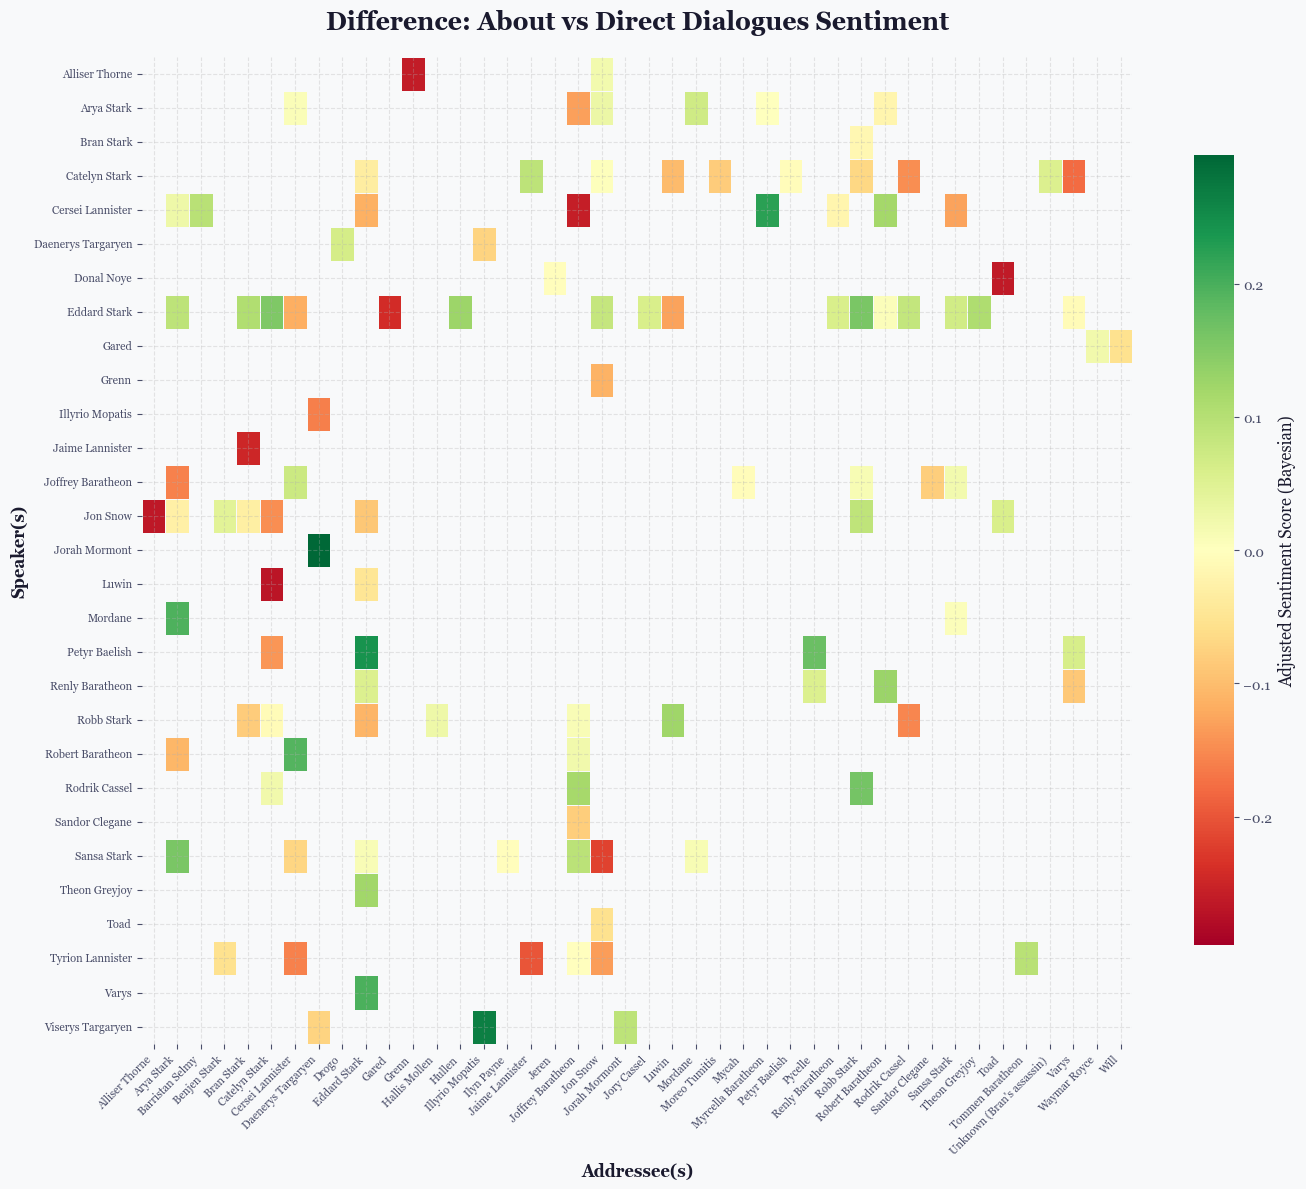

In [19]:
# Compute the difference between direct and about sentiment
difference_matrix, all_characters = compute_sentiment_difference_matrix(
    relationship_data, 
    about_relationship_data
)

difference_matrix, col_characters, row_characters = plot_heatmap(
    difference_matrix, 
    all_characters, 
    remove_empty=True,
    title="Difference: About vs Direct Dialogues Sentiment",
    file_name="sentiment-difference-heatmap",
    subdirectory="sentiment"
)

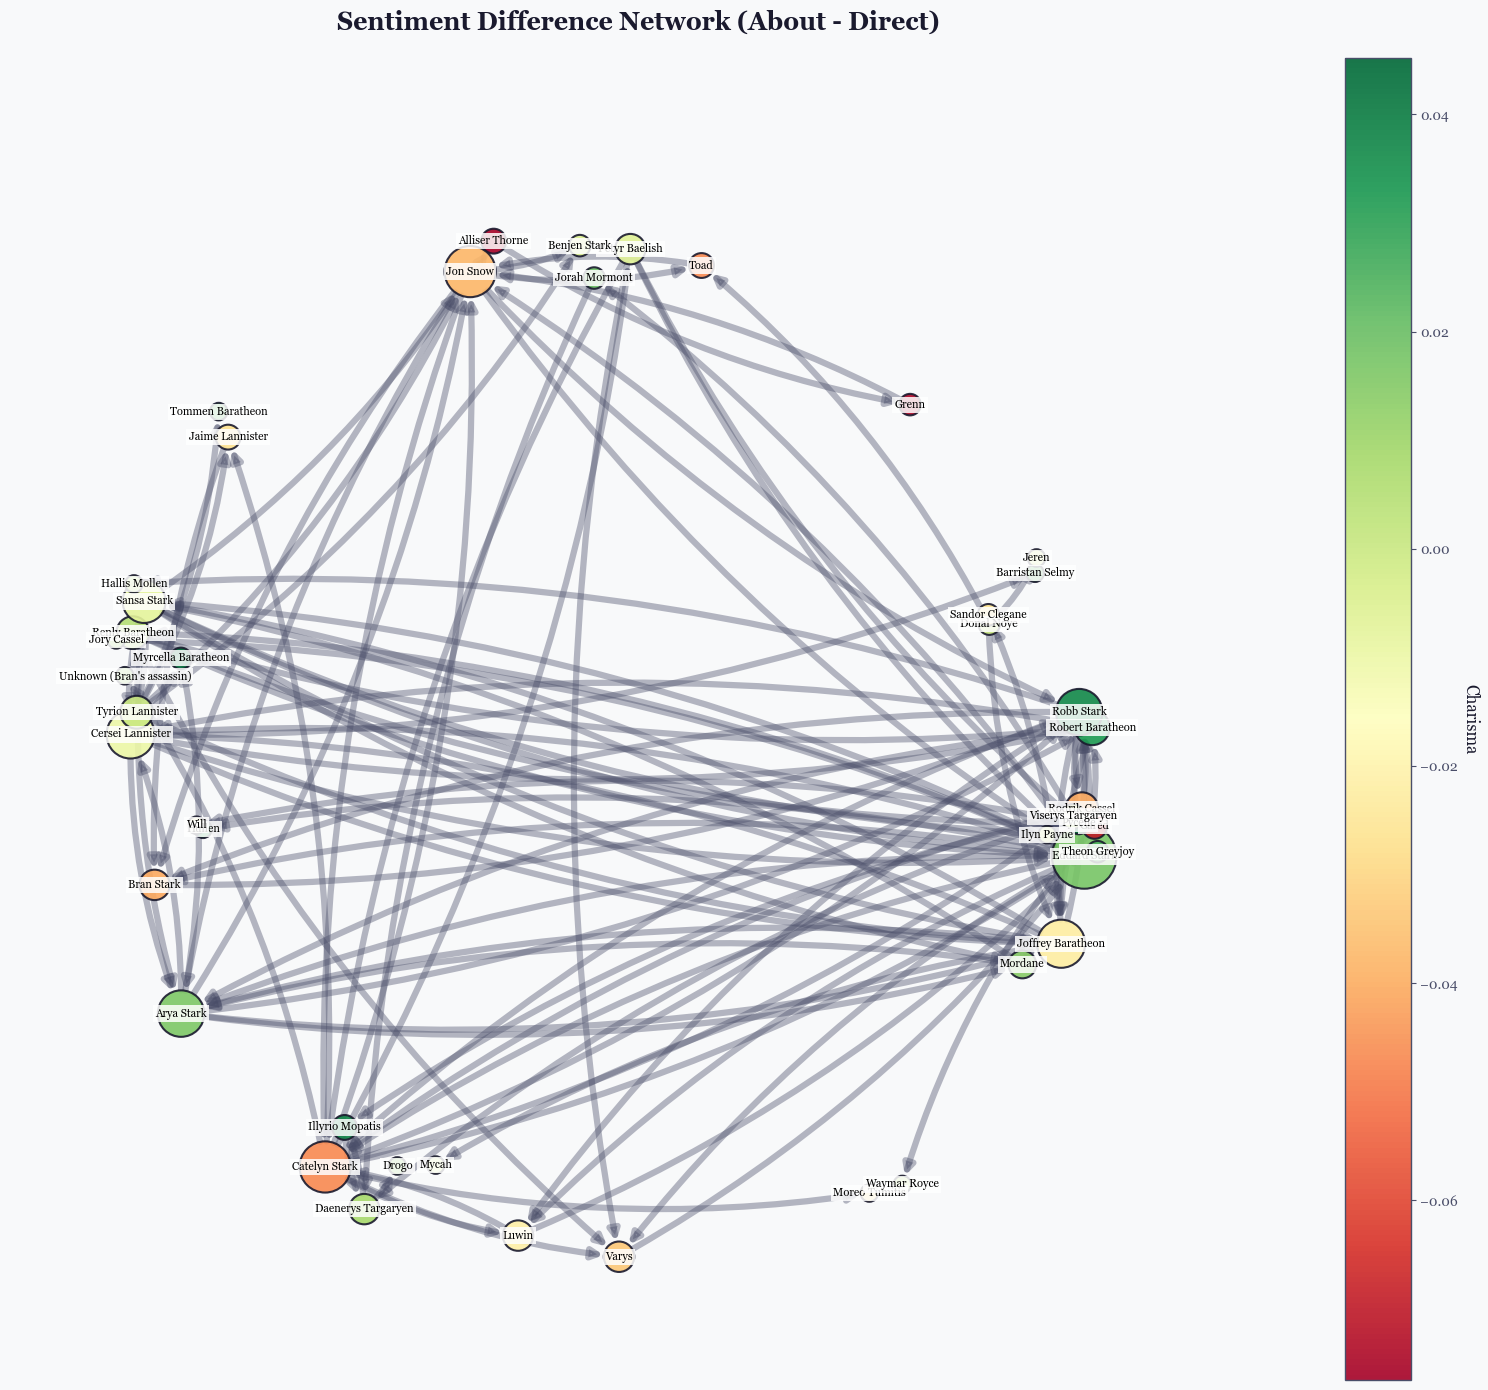

In [20]:
diff_G = create_graph_from_matrix(difference_matrix, row_characters, col_characters)
draw_network(
    diff_G, 
    color_parameter='sentiment', 
    title="Sentiment Difference Network (About - Direct)", 
    file_name="sentiment-difference-network",
    subdirectory="sentiment"
)

# Community detection

In [21]:
# Community Detection Analysis
# Using Louvain Method for detecting character communities

import pandas as pd

In [22]:
# 1. CREATE THE GRAPH (if you haven't already)
G = create_graph(path_name='data/dialogues.csv', edge_type='direct')
all_dialogues = pd.read_csv('data/dialogues.csv')

In [23]:
# 2. COMMUNITY DETECTION USING LOUVAIN METHOD
G, partition, modularity = comm.detect_communities(G)

Number of communities detected: 8
Modularity Q-score: 0.5382
(Higher modularity indicates stronger community structure, max = 1.0)



In [24]:
# 3. ANALYZE COMMUNITY COMPOSITION
community_info = comm.analyze_communities(partition, G)

COMMUNITY COMPOSITION ANALYSIS

COMMUNITY 1 (21 members)
Members:
   1. Jon Snow                  (weighted degree: 14462.0)
   2. Tyrion Lannister          (weighted degree: 9090.0)
   3. Cersei Lannister          (weighted degree: 3561.0)
   4. Donal Noye                (weighted degree: 3530.0)
   5. Jaime Lannister           (weighted degree: 2413.0)
   6. Benjen Stark              (weighted degree: 2083.0)
   7. Alliser Thorne            (weighted degree: 1400.0)
   8. Toad                      (weighted degree: 732.0)
   9. Jeren                     (weighted degree: 433.0)
  10. Grenn                     (weighted degree: 402.0)
  11. Myrcella Baratheon        (weighted degree: 314.0)
  12. Tommen Baratheon          (weighted degree: 302.0)
  13. Chayle                    (weighted degree: 235.0)
  14. Unknown (Raper)           (weighted degree: 150.0)
  15. Unknown (Stark servant)   (weighted degree: 137.0)
  16. Jeor Mormont              (weighted degree: 122.0)
  17. Ghost   

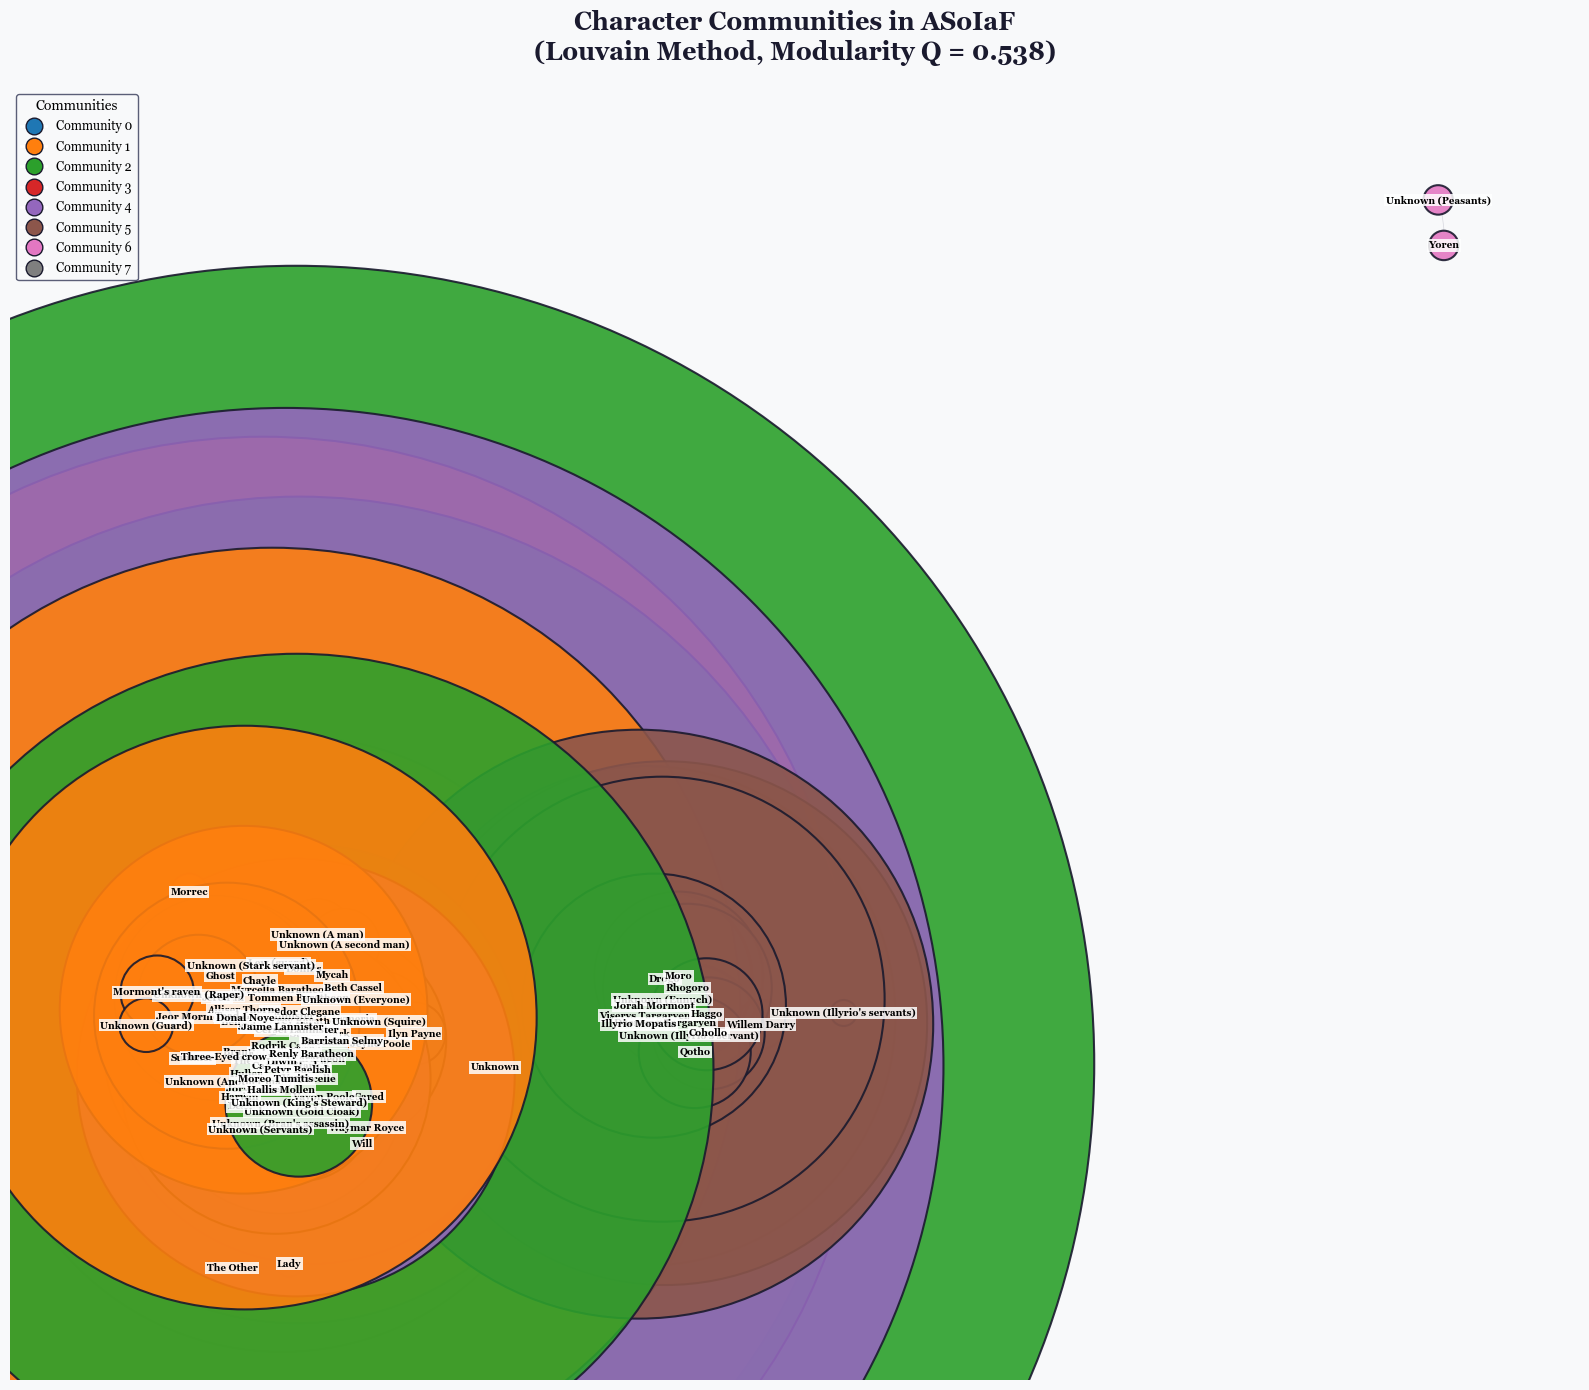

In [25]:
# 4. VISUALIZE COMMUNITIES
comm.visualize_communities(
    G, 
    partition, 
    title="Character Communities in ASoIaF",
    file_name="communities-network",
    subdirectory="community",
    modularity=modularity
)

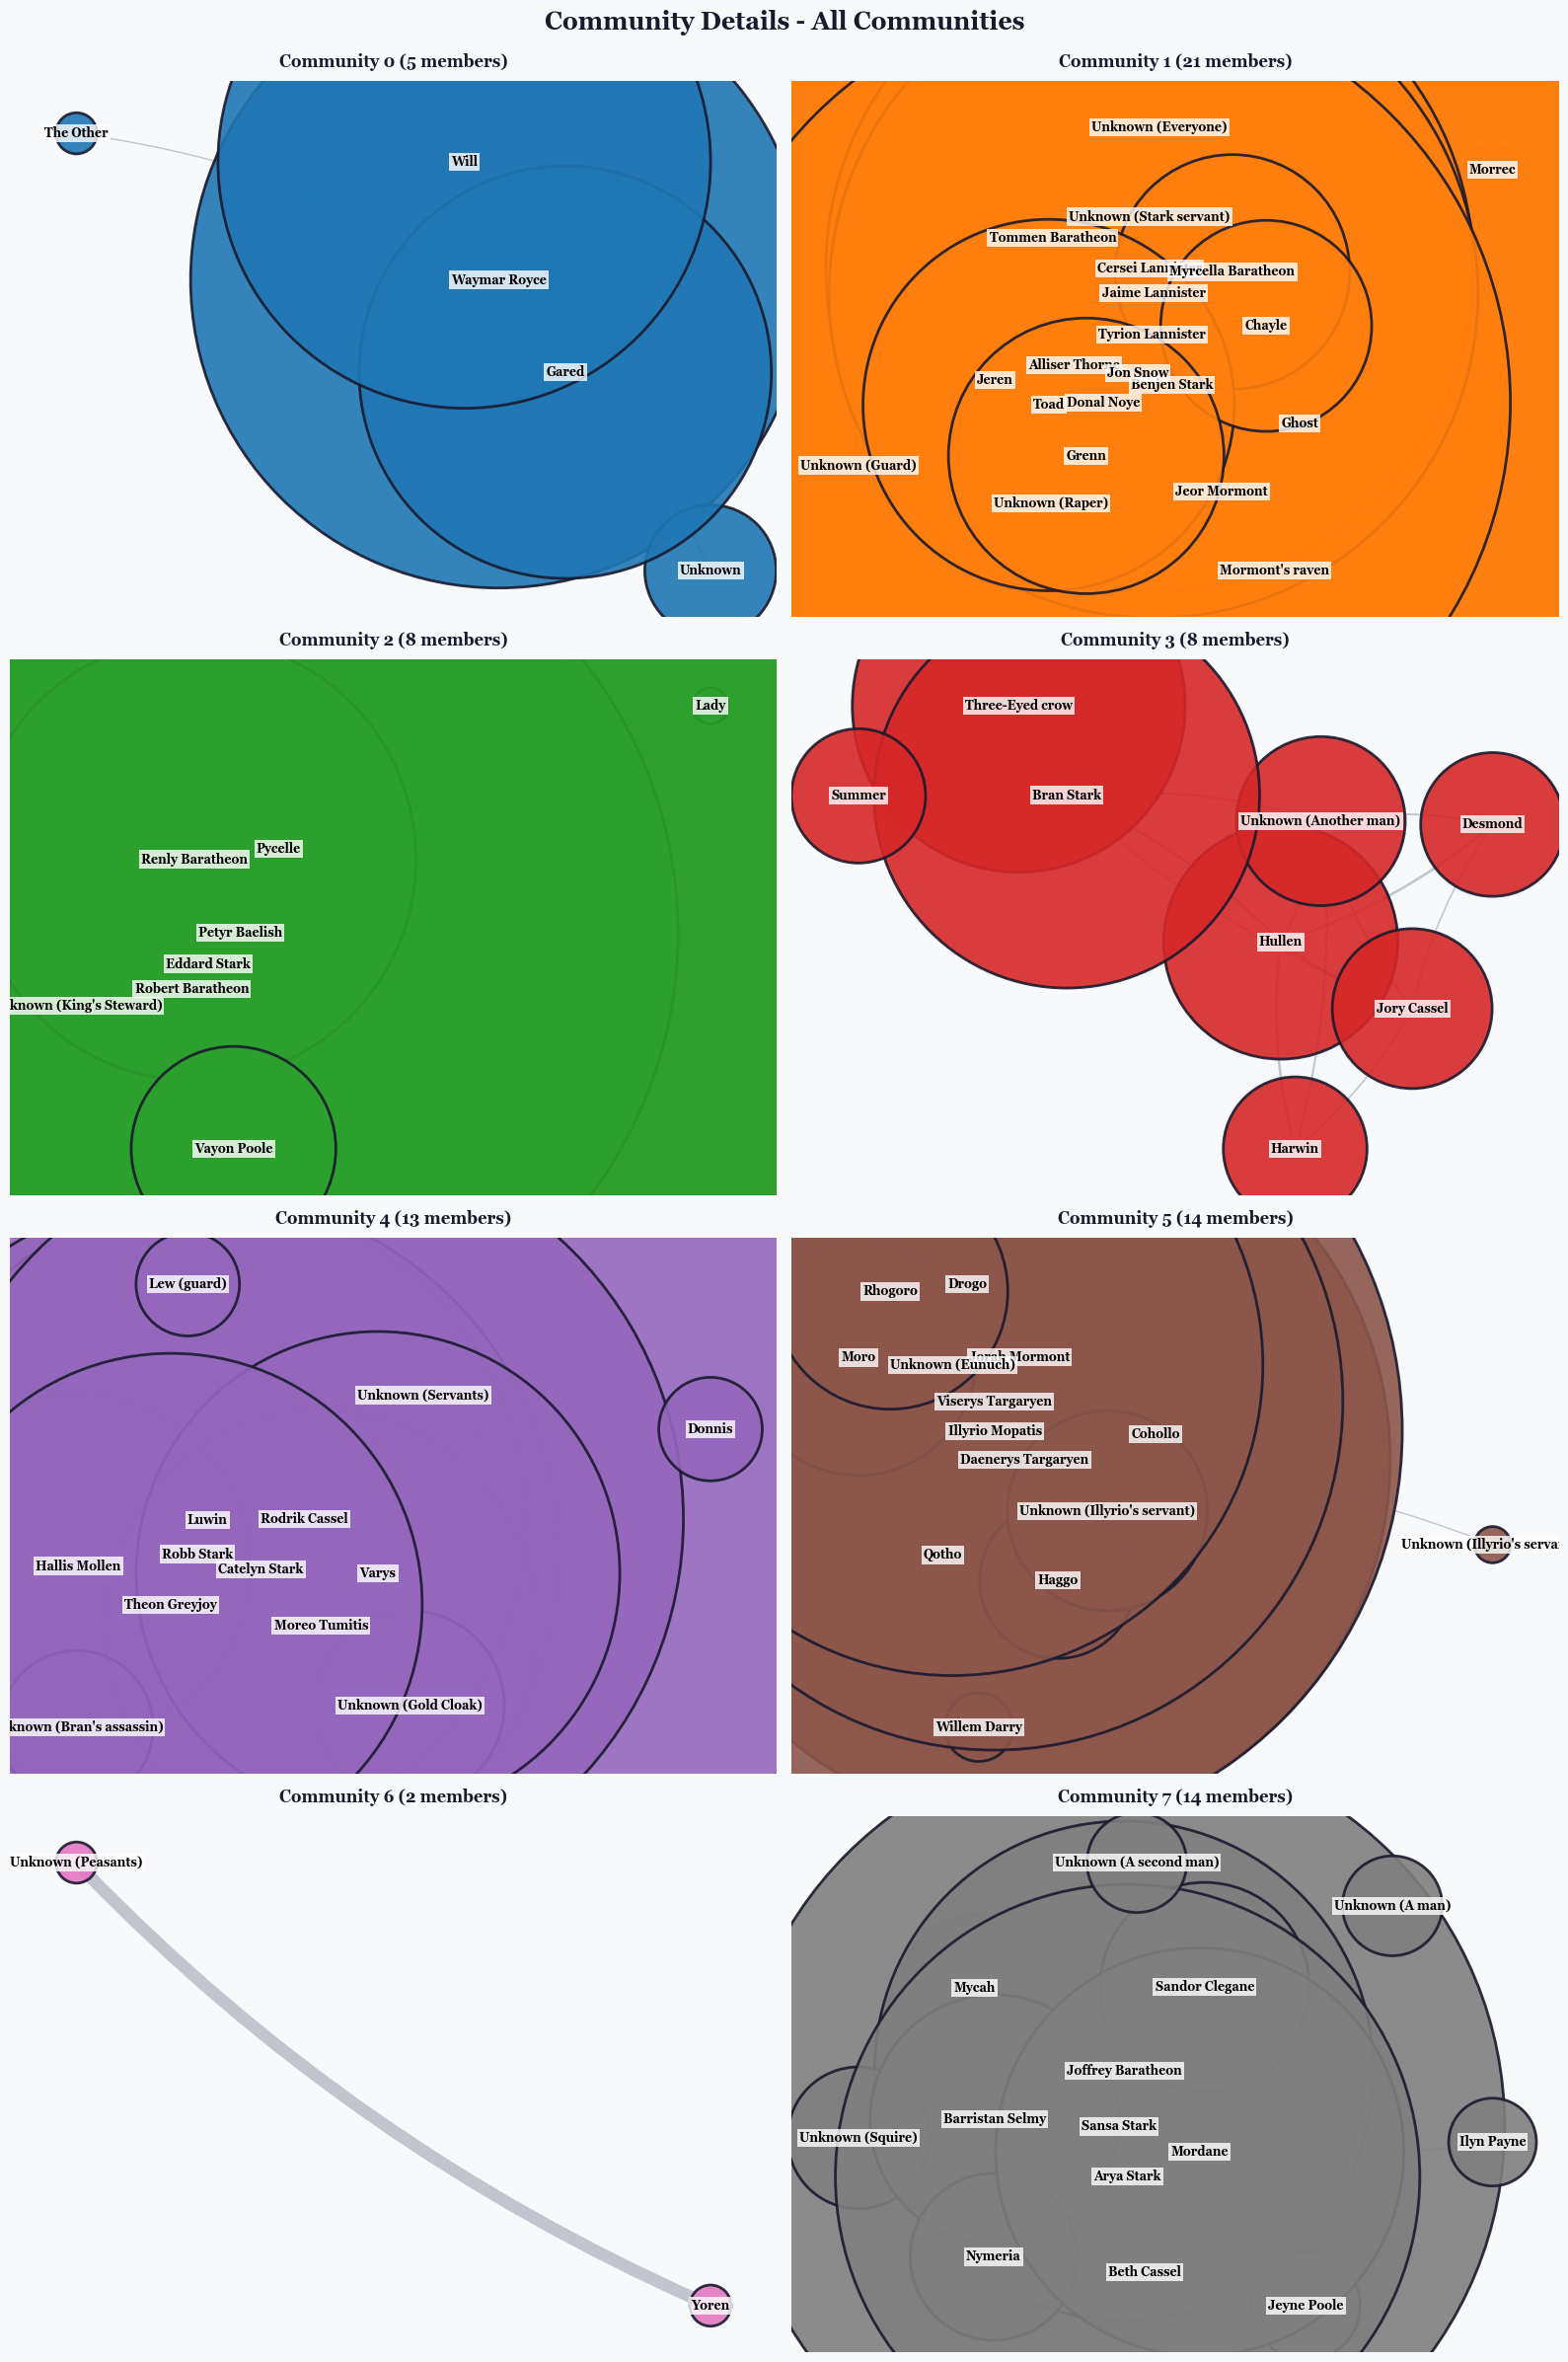

In [26]:
# 4.a VISUALIZE EACH COMMUNITY SEPARATELY IN A GRID (2 columns)
comm.visualize_communities_separately_grid(
    G, 
    partition, 
    n_cols=2,
    title="Community Details - All Communities",
    file_name="communities-networks",
    subdirectory="community"
)

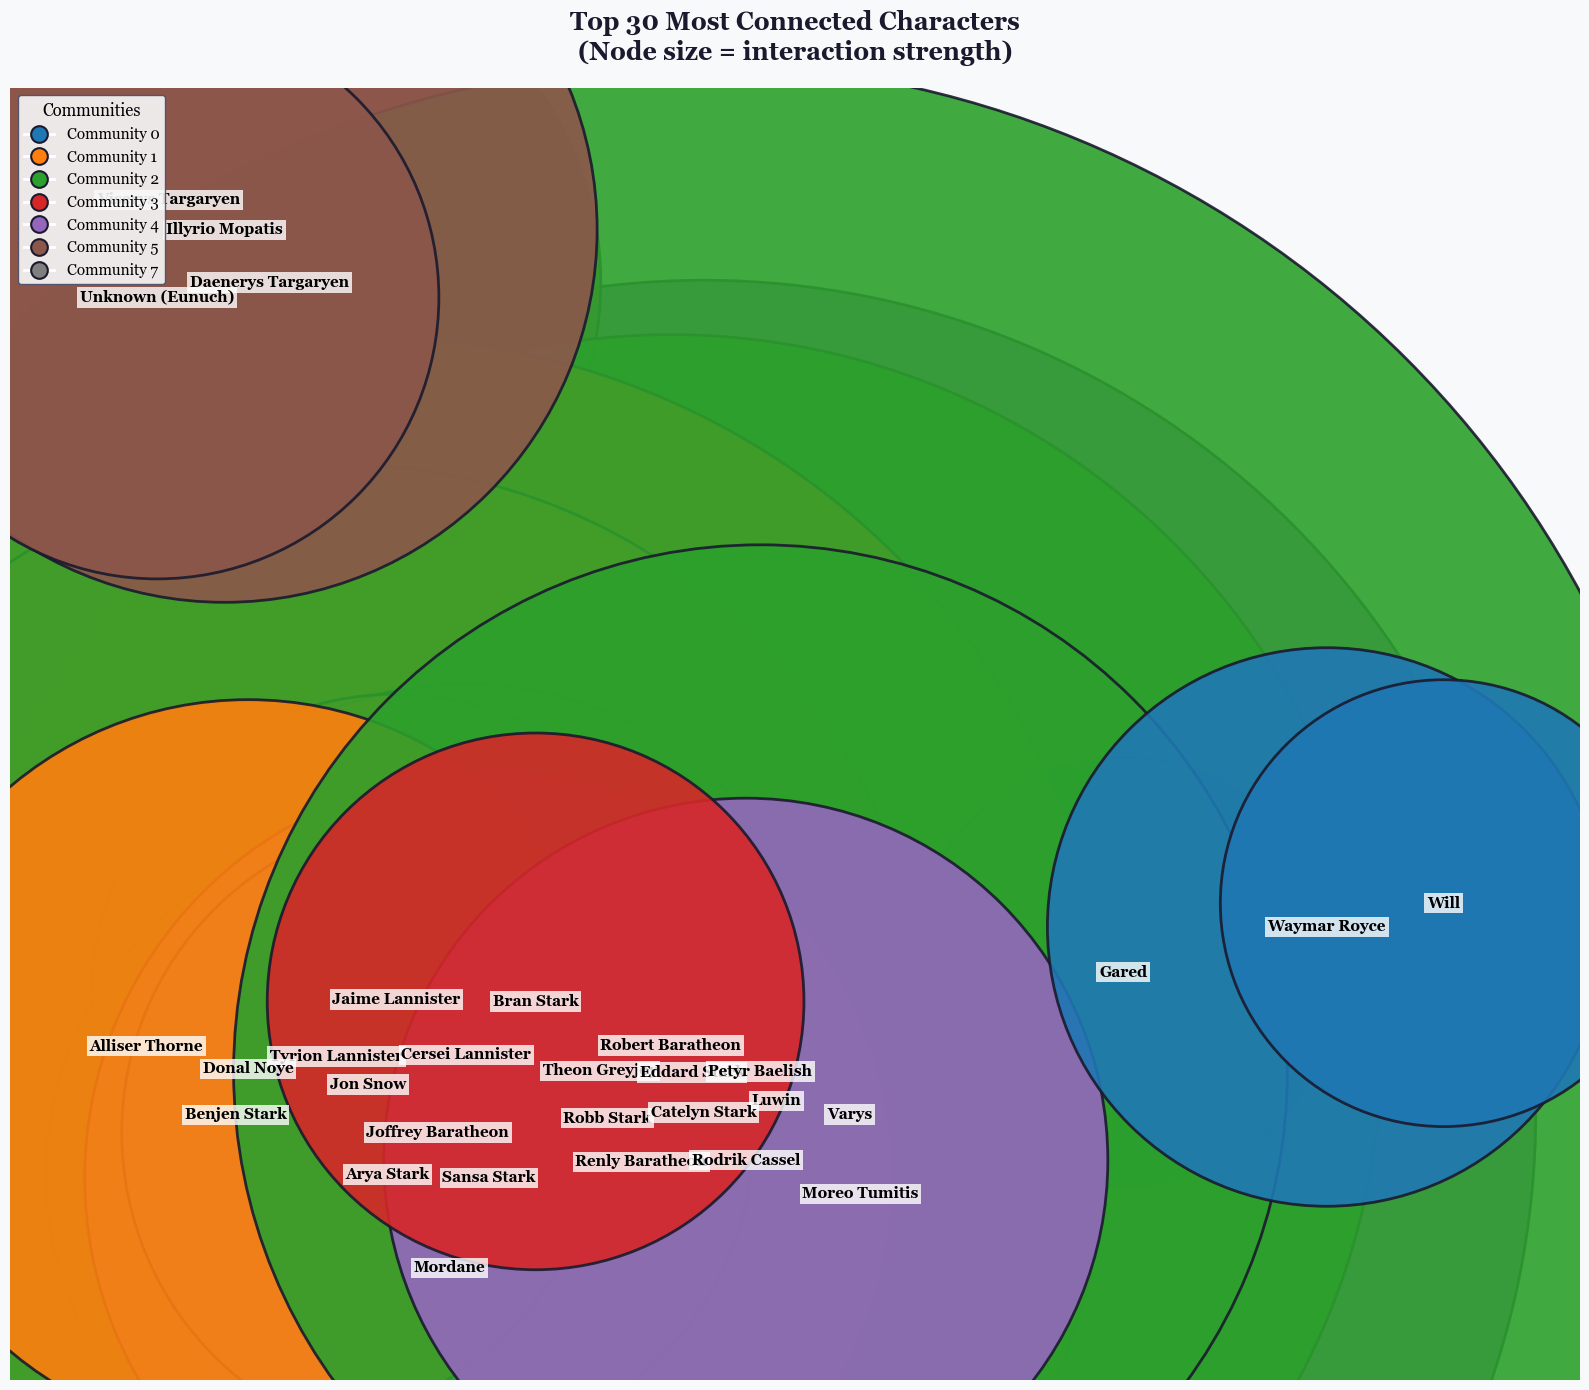

In [27]:
# 4.b VISUALIZE ONLY MAJOR CHARACTERS (Top N by Degree)
comm.visualize_major_characters(
    G, 
    partition, 
    top_n=30,
    title="Top 30 Most Connected Characters",
    file_name="top-30-characters-network",
    subdirectory="community"
)

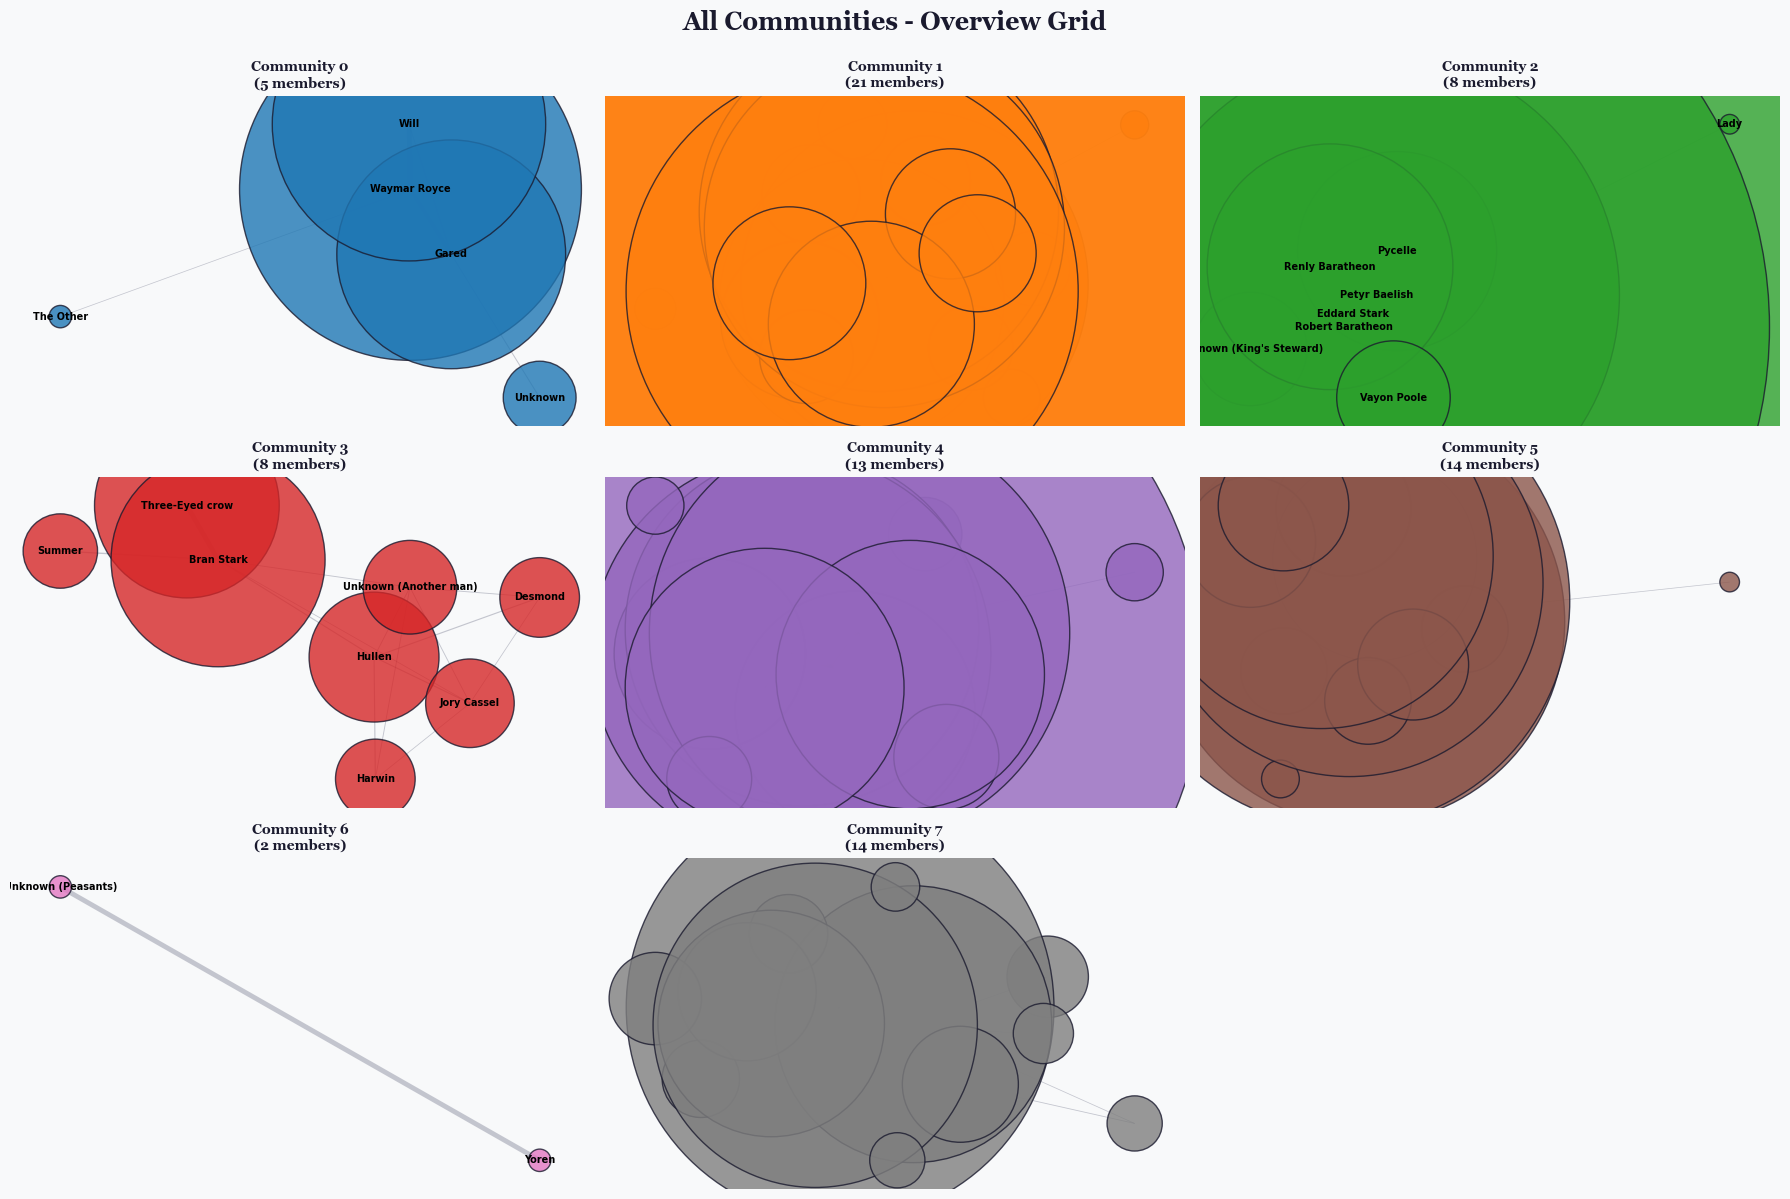

In [28]:
# 4.c COMMUNITY OVERVIEW GRID (Alternative Compact View)
comm.visualize_communities_grid(
    G, 
    partition, 
    n_cols=3,
    title="All Communities - Overview Grid",
    file_name="all-communities-overview-grid",
    subdirectory="community"
)

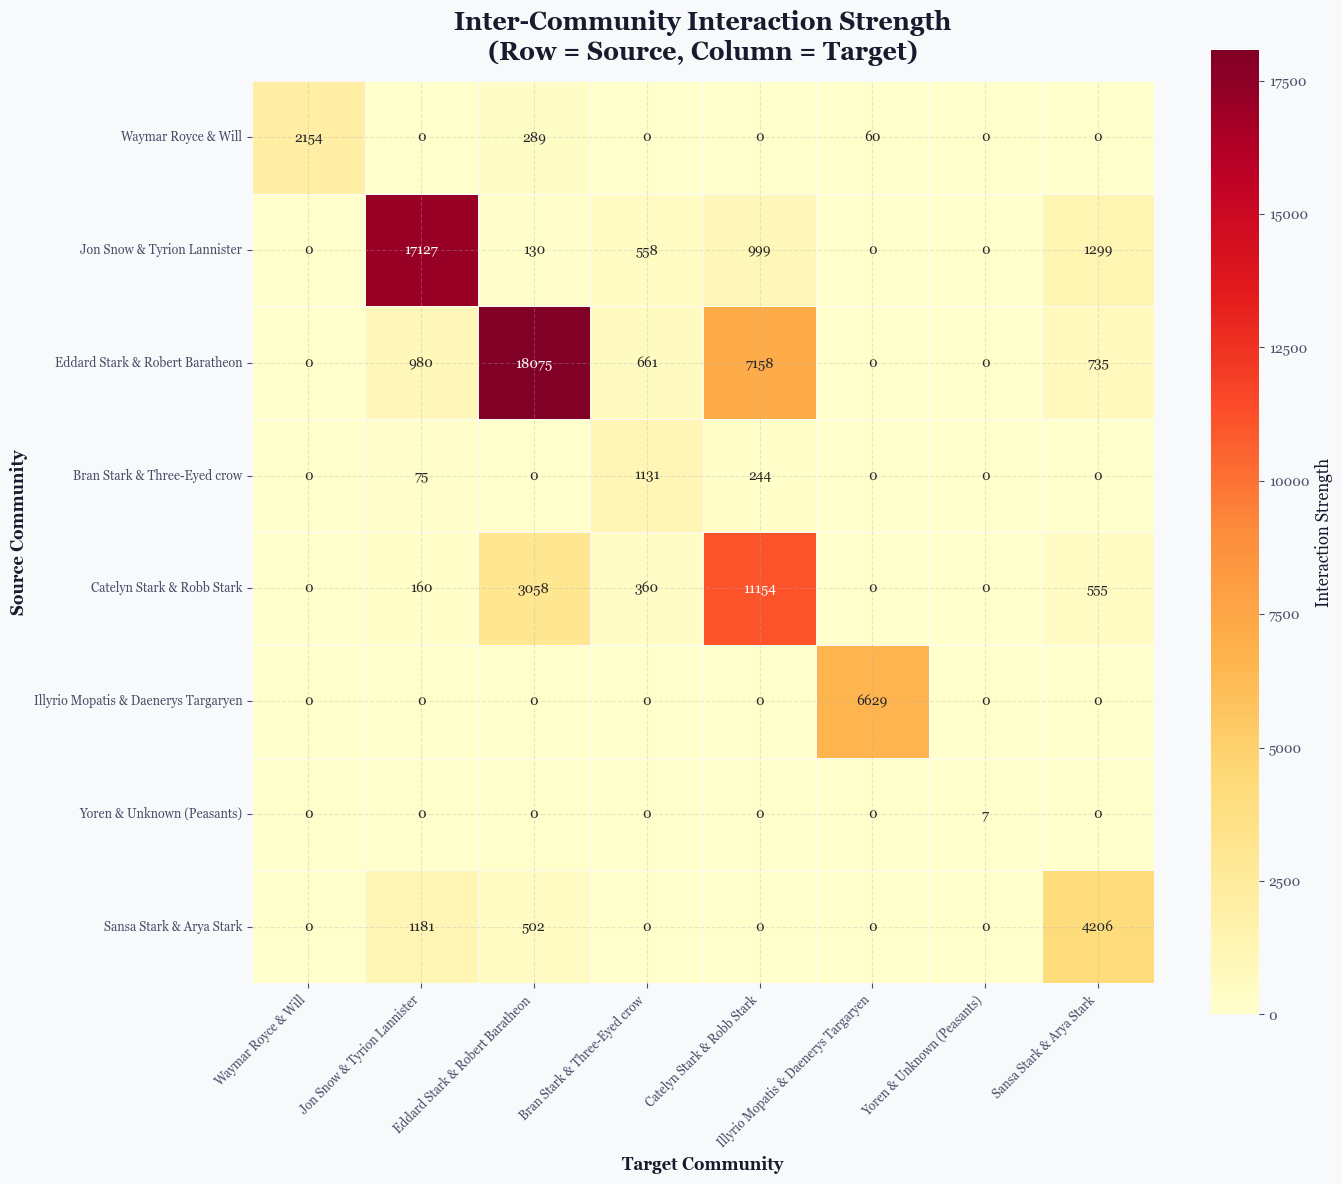


COMMUNITY INTERACTION INTERPRETATION

Diagonal values (high) = Strong internal communication
Off-diagonal values (high) = Strong cross-community interaction

Top cross-community interactions:
  1. Eddard Stark & Robert Baratheon → Catelyn Stark & Robb Stark     (7158)
  2. Catelyn Stark & Robb Stark     → Eddard Stark & Robert Baratheon (3058)
  3. Jon Snow & Tyrion Lannister    → Sansa Stark & Arya Stark       (1299)
  4. Sansa Stark & Arya Stark       → Jon Snow & Tyrion Lannister    (1181)
  5. Jon Snow & Tyrion Lannister    → Catelyn Stark & Robb Stark     (999)


In [29]:
# 5. COMMUNITY INTERACTION MATRIX (with meaningful names)
comm.plot_community_interaction_matrix_named(
    G, 
    partition,
    title="Inter-Community Interaction Strength",
    file_name="inter-community-confusion-matrix",
    subdirectory="community"
)

In [30]:
# 6. TF-IDF ANALYSIS OF DIALOGUE BY COMMUNITY
community_texts = tfidf.extract_community_dialogues(all_dialogues, partition)

Extracted dialogues for 8 communities
  Community 0: 958 words
  Community 1: 5601 words
  Community 2: 8211 words
  Community 3: 354 words
  Community 4: 4575 words
  Community 5: 1602 words
  Community 6: 1 words
  Community 7: 2047 words


In [31]:
# 7. COMPUTE TF-IDF SCORES
community_tfidf = tfidf.compute_community_tfidf(community_texts, max_features=20)

# Display results
tfidf.print_tfidf_results(community_tfidf, top_n=15)

TOP TF-IDF TERMS BY COMMUNITY

COMMUNITY 0
   1. dead                      0.5868
   2. men                       0.4401
   3. did                       0.2612
   4. lord                      0.2334
   5. like                      0.1945
   6. snow                      0.1657
   7. said                      0.1467
   8. hand                      0.1306
   9. make                      0.1306
  10. man                       0.1167
  11. don                       0.1167
  12. wall                      0.1105
  13. better                    0.0978
  14. time                      0.0871
  15. thing                     0.0871

COMMUNITY 1
   1. stark                     0.2643
   2. don                       0.2427
   3. boy                       0.2355
   4. bastard                   0.2299
   5. know                      0.2174
   6. ll                        0.1861
   7. lord                      0.1780
   8. wall                      0.1724
   9. snow                      0.1724
  10. ki

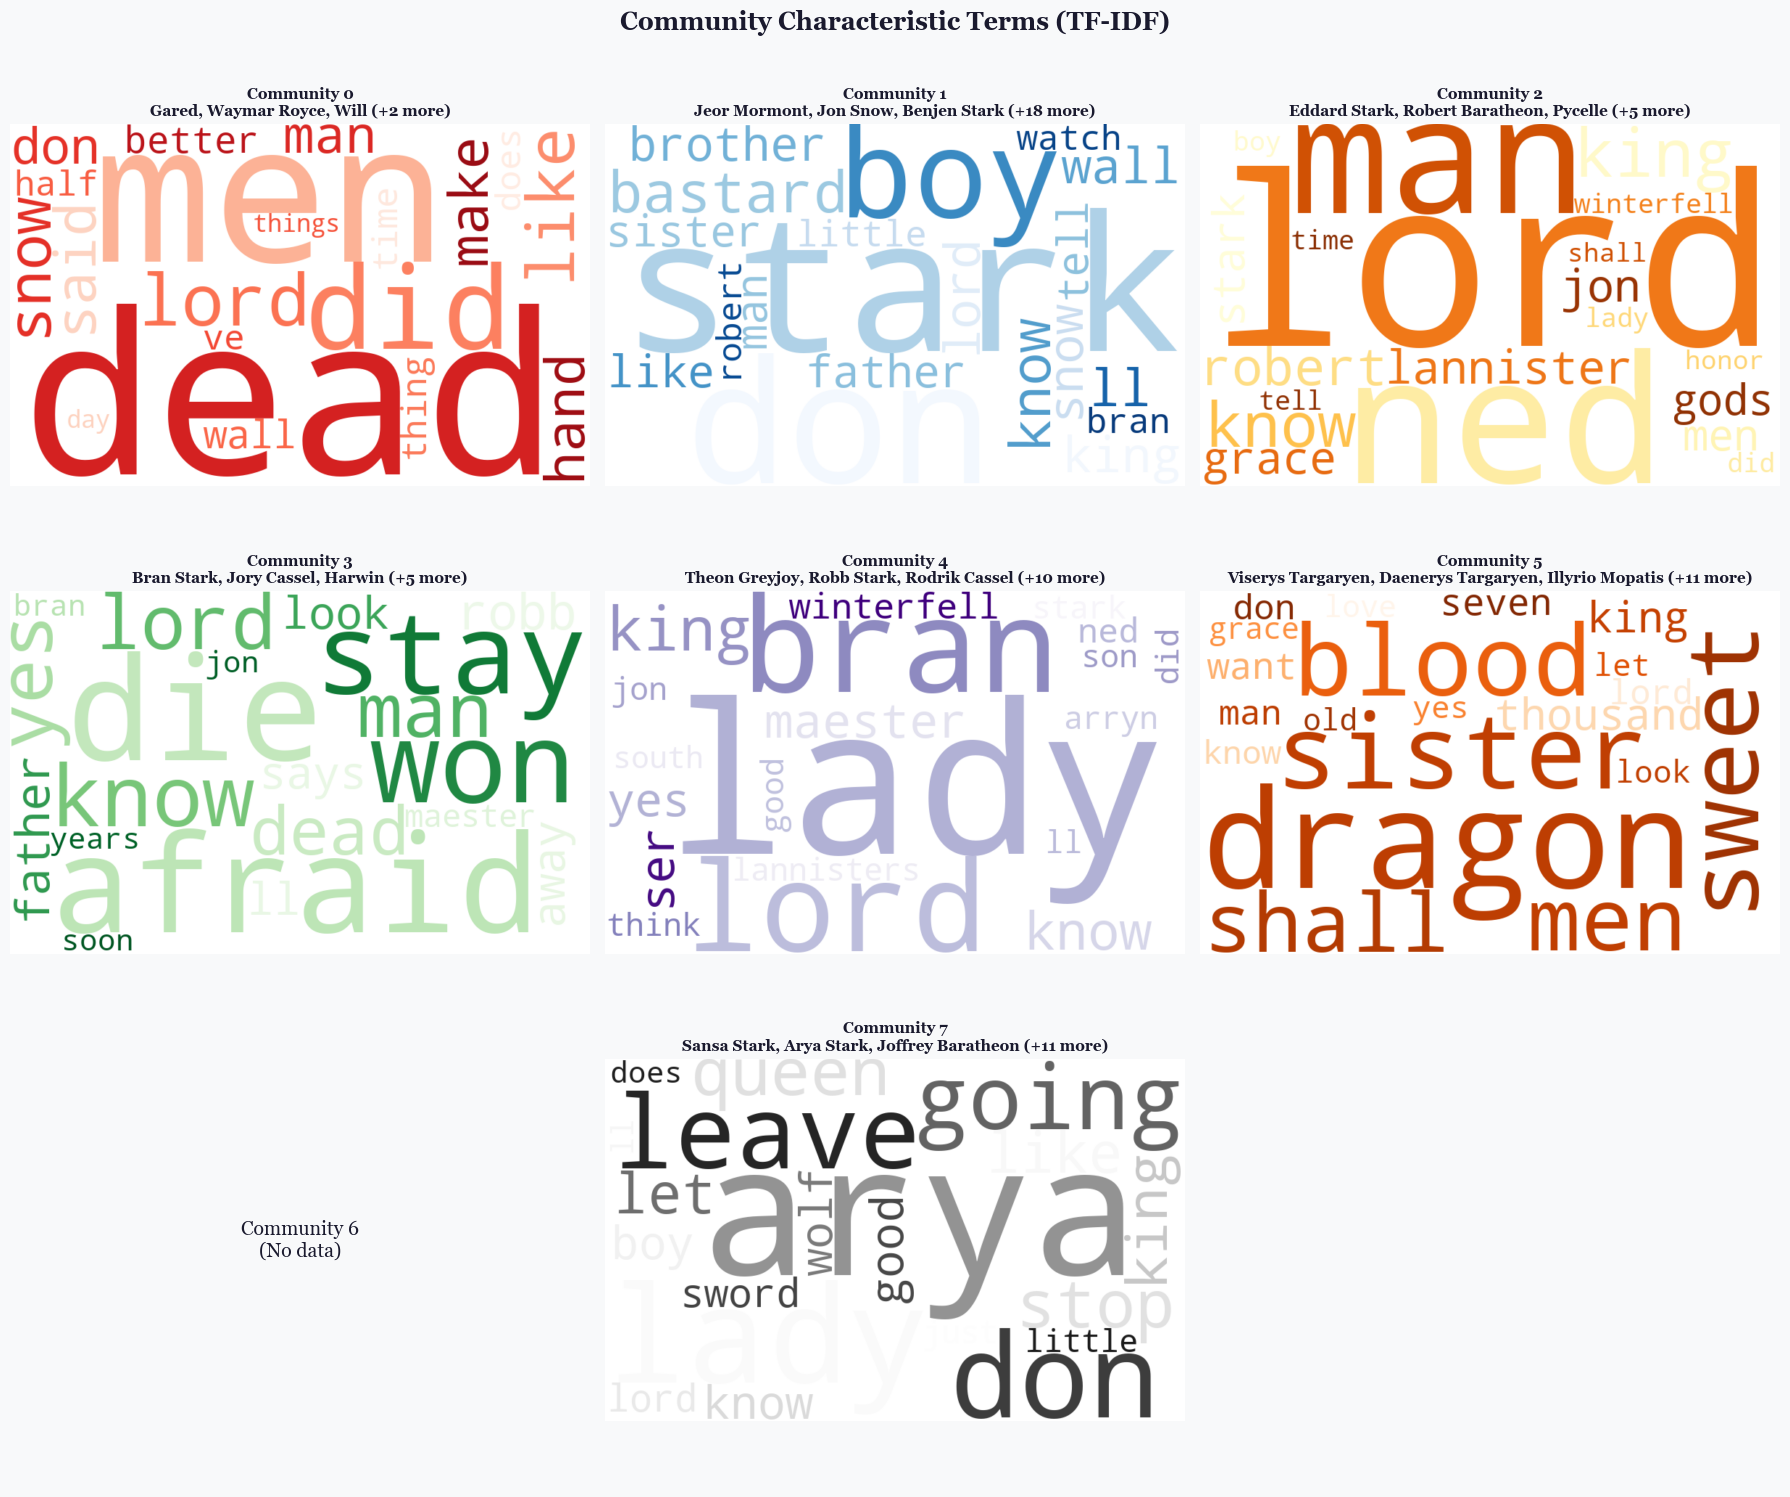

In [32]:
# 8. VISUALIZE TF-IDF WITH WORD CLOUDS
tfidf.create_community_wordclouds(
    community_tfidf, 
    partition,
    title="Community Characteristic Terms (TF-IDF)",
    file_name="community-characteristic-terms-tfidf",
    subdirectory="community"
)

In [33]:
# 9. SUMMARY STATISTICS
comm.print_summary_statistics(partition, modularity, G)

COMMUNITY DETECTION SUMMARY

Algorithm: Louvain Method
Number of nodes: 85
Number of communities: 8
Modularity (Q-score): 0.5382

Community Size Statistics:
  Largest community: 21 members
  Smallest community: 2 members
  Average community size: 10.62 members
  Median community size: 10.50 members

INTERPRETATION GUIDE
Modularity Score Interpretation:
  Q > 0.3   : Strong community structure
  Q = 0.2-0.3 : Moderate community structure
  Q < 0.2   : Weak community structure

Your modularity (0.5382) indicates: STRONG community structure ✓


---

# 4. Extended Analysis (Optional)

These additional visualizations provide deeper insights into the network structure and character relationships. Uncomment and run the cells below to generate them.


In [35]:
# Import extension functions
from lib.extensions import (
    plot_character_rankings_comparison,
    plot_sentiment_distribution,
    plot_community_sentiment_comparison,
    plot_dialogue_volume_heatmap,
    analyze_pov_characters,
    plot_degree_vs_sentiment
)


In [ ]:
# Recreate main graph for extended analysis
G_main = create_graph(path_name='data/dialogues.csv', edge_type='direct')

# Character Rankings Comparison - see how characters rank across different metrics
plot_character_rankings_comparison(G_main, top_n=15)


In [ ]:
# Sentiment Distribution Analysis - overall sentiment score distribution
plot_sentiment_distribution(relationship_data)


In [ ]:
# Dialogue Volume Heatmap - visualize communication intensity between top characters
plot_dialogue_volume_heatmap(G_main, top_n=20)


In [ ]:
# POV Character Analysis - analyze network from POV characters' perspectives
analyze_pov_characters(G_main)


In [ ]:
# Degree vs Sentiment - relationship between connectivity and sentiment
plot_degree_vs_sentiment(G_main, relationship_data)
